<img src="udea.png">

<div style="text-align: center;">
  <h1>ANALÍTICA DE DATOS Y MACHINE LEARNING APLICADO A LAS CIENCIAS POLÍTICAS</h1>
</div>

## Reducción de Dimensiones con PCA: Encontrando Dimensiones Interpretables

**Objetivo del curso:** Aprender a usar técnicas de reducción de dimensiones para simplificar datos complejos en ciencias sociales, encontrando dimensiones subyacentes que sean interpretables y útiles para la investigación.


In [1]:
# ============================================================================
# INSTALACIÓN DE LIBRERÍAS NECESARIAS
# ============================================================================
# Ejecutar esta celda solo si necesitas instalar las librerías

#!pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.6 MB/s  0:00:00
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.7 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.0 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.8/38.1 MB 4.1 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/38.1 MB 6.2 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2

In [2]:
# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

# pandas: Para trabajar con datos estructurados (DataFrames, Series)
# Es como Excel pero programable - nos permite organizar y manipular datos fácilmente
import pandas as pd

# numpy: Para operaciones matemáticas y arrays (vectores, matrices)
# Fundamental para cálculos numéricos en Python
import numpy as np

# matplotlib: Para crear gráficos y visualizaciones
# Es la librería base para hacer gráficos en Python
import matplotlib.pyplot as plt

# seaborn: Extensión de matplotlib con gráficos más bonitos y estadísticos
# Facilita crear visualizaciones atractivas con menos código
import seaborn as sns

# sklearn (scikit-learn): Librería de Machine Learning
# PCA: Para reducción de dimensiones (Análisis de Componentes Principales)
from sklearn.decomposition import PCA
# TSNE: Otra técnica de reducción de dimensiones, buena para visualizar clusters
from sklearn.manifold import TSNE
# StandardScaler: Para estandarizar datos (importante antes de PCA)
from sklearn.preprocessing import StandardScaler

# warnings: Para controlar mensajes de advertencia
# Ignoramos warnings para que el notebook se vea más limpio
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURACIÓN DE VISUALIZACIÓN
# ============================================================================

# Establecer un estilo de gráficos con fondo gris y cuadrícula
# Esto hace que los gráficos se vean más profesionales
plt.style.use('seaborn-v0_8-darkgrid')

# Elegir una paleta de colores atractiva para los gráficos
# "husl" es una paleta que funciona bien para personas con daltonismo
sns.set_palette("husl")

# Mostrar gráficos directamente en el notebook (no en ventana separada)
# Esto es necesario para Jupyter Notebook
%matplotlib inline


---

# PARTE 1: REDUCCIÓN DE DIMENSIONES

## ¿Qué es la reducción de dimensiones?

### El problema que resuelve

Imagina que eres un politólogo estudiando la calidad democrática en 20 países. Tienes datos sobre:
- PIB per cápita
- Tasa de desempleo
- Índice de democracia
- Libertad de prensa
- Participación electoral
- Coeficiente Gini (desigualdad)
- Esperanza de vida
- Educación
- Estado de derecho
- Control de corrupción
- Eficiencia del gobierno
- ... y muchas más variables

**¿Cómo visualizas 12 dimensiones a la vez?** No puedes. Solo puedes ver 2 o 3 variables en un gráfico.

### La solución: Reducción de dimensiones

**Intuición:** La reducción de dimensiones nos permite:
- **Simplificar** datos complejos manteniendo la información más importante
- **Visualizar** patrones que no podríamos ver de otra manera
- **Encontrar** relaciones ocultas entre variables

**Analogía:** Es como hacer un mapa 2D de un mundo 3D. Perdemos algo de información (no podemos ver la altura exacta de las montañas), pero ganamos la capacidad de ver el panorama general y navegar.

### ¿Por qué es útil en ciencias políticas?

En política, muchas variables están relacionadas. Por ejemplo:
- Países con mejor estado de derecho suelen tener menos corrupción
- Países más ricos suelen tener mejor educación
- Países más democráticos suelen tener más libertad de prensa

La reducción de dimensiones nos ayuda a encontrar estas **dimensiones subyacentes** que explican la mayoría de la variación en nuestros datos.


## Ejemplo práctico: Datos políticos de países

### Nuestro dataset

Vamos a trabajar con datos simulados de **20 países latinoamericanos**. Cada país tiene **12 variables** que miden diferentes aspectos:

**Variables económicas:**
- PIB per cápita
- Tasa de desempleo
- Inflación

**Variables políticas:**
- Índice de democracia
- Libertad de prensa
- Participación electoral

**Variables sociales:**
- Coeficiente Gini (desigualdad)
- Esperanza de vida
- Educación secundaria

**Variables institucionales:**
- Estado de derecho
- Control de corrupción
- Eficiencia del gobierno

> **Nota:** Estos son datos simulados para fines educativos. En la práctica, podrías usar datos reales del Banco Mundial, Freedom House, o bases de datos de indicadores políticos.


In [3]:
# ============================================================================
# CREACIÓN DEL DATASET DE EJEMPLO
# ============================================================================

# Establecer semilla aleatoria para reproducibilidad
# Esto asegura que cada vez que ejecutemos el código, obtengamos los mismos datos
# Útil para enseñanza y debugging
np.random.seed(42)

# Lista de países latinoamericanos que vamos a analizar
paises = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Perú', 
          'Venezuela', 'Uruguay', 'Ecuador', 'Paraguay', 'Bolivia', 'Panamá',
          'Costa Rica', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador',
          'República Dominicana', 'Cuba', 'Haití']

# Guardar el número de países para usar en la generación de datos
n_paises = len(paises)

# Crear un diccionario con todos nuestros datos
# Un diccionario es como una tabla donde cada clave es una columna
datos = {
    # Columna con nombres de países
    'Pais': paises,
    
    # ========================================================================
    # VARIABLES ECONÓMICAS
    # ========================================================================
    # PIB per cápita: Distribución normal con media 12000 y desviación 5000
    # np.random.normal genera valores que siguen una curva de campana
    'PIB_per_capita': np.random.normal(12000, 5000, n_paises),
    
    # Tasa de desempleo: Valores uniformes entre 3% y 15%
    # np.random.uniform genera valores distribuidos uniformemente
    'Tasa_desempleo': np.random.uniform(3, 15, n_paises),
    
    # Inflación: Valores entre 1% y 25%
    'Inflacion': np.random.uniform(1, 25, n_paises),
    
    # ========================================================================
    # VARIABLES POLÍTICAS
    # ========================================================================
    # Índice de democracia: Escala de 0 a 10 (valores entre 4 y 9)
    'Indice_democracia': np.random.uniform(4, 9, n_paises),
    
    # Libertad de prensa: Escala de 0 a 100 (valores entre 20 y 80)
    # Valores más altos = más libertad
    'Libertad_prensa': np.random.uniform(20, 80, n_paises),
    
    # Participación electoral: Porcentaje de votantes (50% a 90%)
    'Participacion_electoral': np.random.uniform(50, 90, n_paises),
    
    # ========================================================================
    # VARIABLES SOCIALES
    # ========================================================================
    # Coeficiente Gini: Mide desigualdad (0 = igualdad perfecta, 100 = máxima desigualdad)
    # Valores entre 35 y 60 son típicos para países latinoamericanos
    'Gini': np.random.uniform(35, 60, n_paises),
    
    # Esperanza de vida: Años promedio (65 a 80 años)
    'Esperanza_vida': np.random.uniform(65, 80, n_paises),
    
    # Educación secundaria: Porcentaje de población con educación secundaria
    'Educacion_secundaria': np.random.uniform(40, 95, n_paises),
    
    # ========================================================================
    # VARIABLES INSTITUCIONALES
    # ========================================================================
    # Estado de derecho: Escala de 0 a 10 (valores entre 3 y 7)
    'Estado_derecho': np.random.uniform(3, 7, n_paises),
    
    # Control de corrupción: Escala de 0 a 10 (valores entre 2 y 6)
    'Control_corrupcion': np.random.uniform(2, 6, n_paises),
    
    # Eficiencia del gobierno: Escala de 0 a 10 (valores entre 3 y 7)
    'Eficiencia_gobierno': np.random.uniform(3, 7, n_paises)
}

# Convertir el diccionario en un DataFrame de pandas
# DataFrame es como una tabla de Excel: filas (países) y columnas (variables)
df = pd.DataFrame(datos)

# Mostrar información del dataset
print(f"Datos de {len(df)} países con {len(df.columns)-1} variables")
print(f"\nDimensiones del DataFrame: {df.shape[0]} filas × {df.shape[1]} columnas")

# Mostrar las primeras 5 filas del dataset
# head() muestra las primeras filas por defecto
print("\nPrimeras filas del dataset:")
df.head()


Datos de 20 países con 12 variables

Dimensiones del DataFrame: 20 filas × 13 columnas

Primeras filas del dataset:


,Pais,PIB_per_capita,Tasa_desempleo,Inflacion,Indice_democracia,Libertad_prensa,Participacion_electoral,Gini,Esperanza_vida,Educacion_secundaria,Estado_derecho,Control_corrupcion,Eficiencia_gobierno
0,Argentina,14483.570765,8.472840,7.210720,5.404673,38.658939,86.302659,40.698379,69.272607,44.965937,4.031767,4.425716,4.060809
1,Brasil,11308.678494,12.422112,16.900535,6.713480,39.510999,59.971689,45.677695,65.553304,85.941637,5.639936,2.036788,3.975959
2,Chile,15238.442691,5.396085,8.481066,4.704621,63.776371,66.415317,55.450369,74.143465,57.642904,6.268889,2.405886,6.892042
3,Colombia,19615.149282,9.170813,13.481633,8.010985,58.253448,80.222046,56.518265,72.540185,50.258518,5.220803,4.654007,4.572391
4,México,10829.233126,10.108975,14.121047,4.372753,73.232765,59.151927,35.173803,65.772181,42.242633,5.118602,2.020246,6.568186


Datos de 20 países con 12 variables

Dimensiones del DataFrame: 20 filas × 13 columnas

Primeras filas del dataset:


,Pais,PIB_per_capita,Tasa_desempleo,Inflacion,Indice_democracia,Libertad_prensa,Participacion_electoral,Gini,Esperanza_vida,Educacion_secundaria,Estado_derecho,Control_corrupcion,Eficiencia_gobierno
0,Argentina,14483.570765,8.472840,7.210720,5.404673,38.658939,86.302659,40.698379,69.272607,44.965937,4.031767,4.425716,4.060809
1,Brasil,11308.678494,12.422112,16.900535,6.713480,39.510999,59.971689,45.677695,65.553304,85.941637,5.639936,2.036788,3.975959
2,Chile,15238.442691,5.396085,8.481066,4.704621,63.776371,66.415317,55.450369,74.143465,57.642904,6.268889,2.405886,6.892042
3,Colombia,19615.149282,9.170813,13.481633,8.010985,58.253448,80.222046,56.518265,72.540185,50.258518,5.220803,4.654007,4.572391
4,México,10829.233126,10.108975,14.121047,4.372753,73.232765,59.151927,35.173803,65.772181,42.242633,5.118602,2.020246,6.568186


### Visualización inicial: ¿Podemos ver patrones?

**El desafío:** Con 12 variables, tenemos un problema. Solo podemos visualizar 2 variables a la vez en un gráfico de dispersión (scatter plot).

**¿Cuántas combinaciones posibles hay?**
- Con 12 variables, hay 12 × 11 / 2 = **66 pares posibles** de variables
- ¡Imposible revisar todos!

**Solución temporal:** Vamos a visualizar solo algunas relaciones que intuitivamente podrían ser importantes:
1. **Democracia vs Libertad de prensa** - ¿Van de la mano?
2. **PIB vs Desigualdad** - ¿Los países ricos son más igualitarios?
3. **Estado de derecho vs Control de corrupción** - ¿Instituciones fuertes controlan mejor la corrupción?
4. **Educación vs Esperanza de vida** - ¿Más educación = mejor salud?

> **Pregunta para reflexionar:** ¿Qué otras relaciones te interesaría explorar? ¿Hay alguna que creas que podría ser sorprendente?


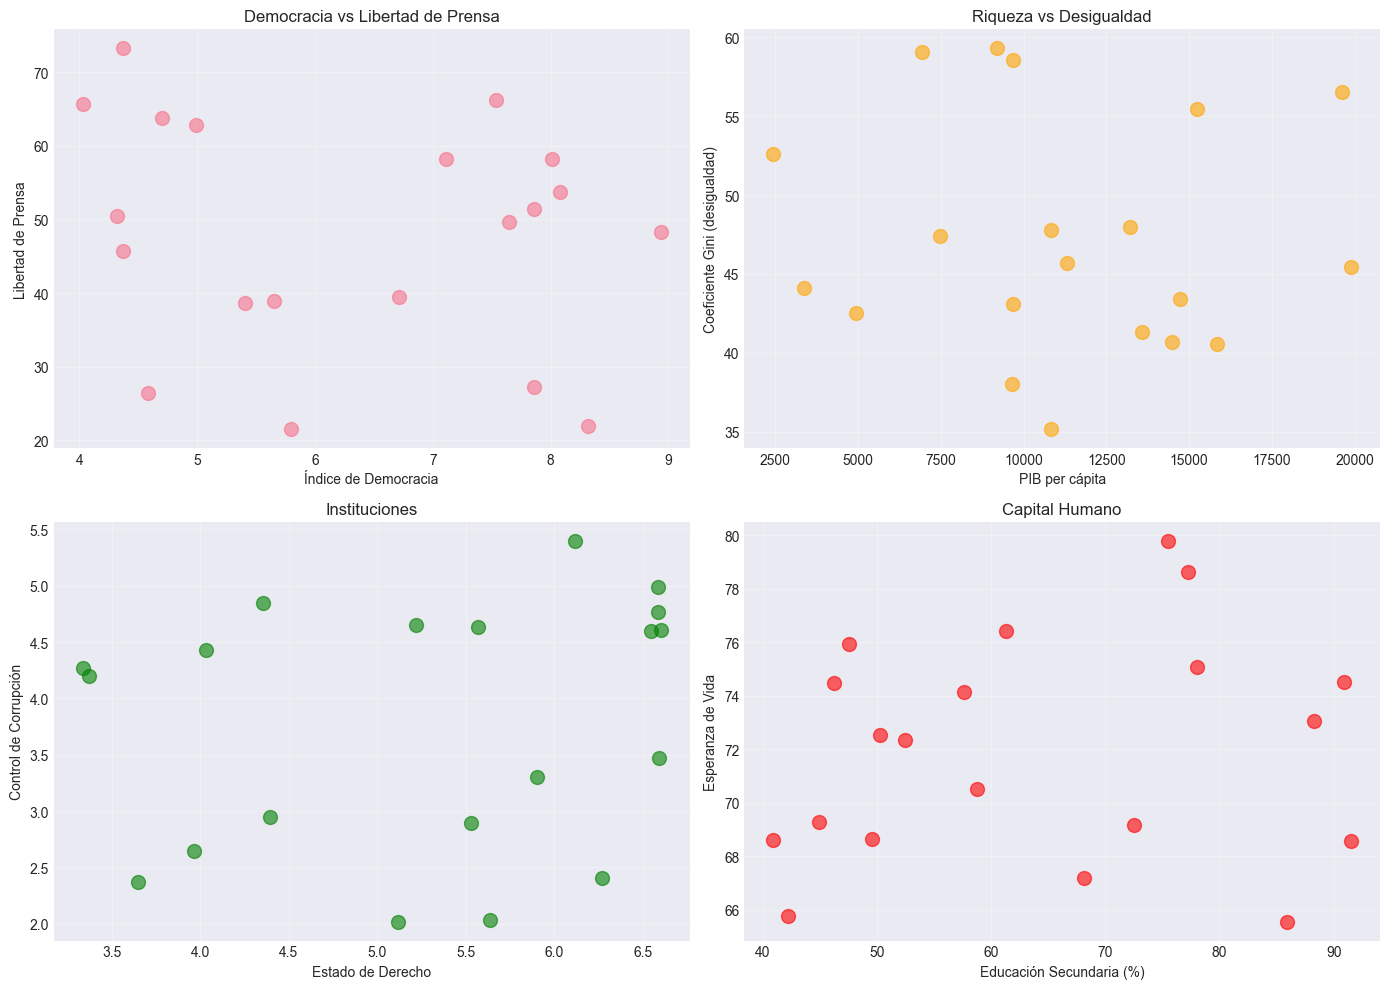


PROBLEMA IDENTIFICADO
Solo podemos visualizar 2 variables a la vez.
Tenemos 12 variables, lo que significa:
  - 12 × 11 / 2 = 66 pares posibles
  - ¡Imposible revisar todos manualmente!

 Necesitamos una técnica que nos permita ver TODAS las variables a la vez...
   ¡Ahí entra la reducción de dimensiones!


In [5]:
# ============================================================================
# VISUALIZACIÓN DE RELACIONES BIVARIADAS (2 VARIABLES A LA VEZ)
# ============================================================================

# Crear una figura con 2 filas y 2 columnas de subgráficos
# figsize=(14, 10) define el tamaño: 14 pulgadas de ancho, 10 de alto
# axes es un array 2x2 que contiene los 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ========================================================================
# GRÁFICO 1: Democracia vs Libertad de prensa
# ========================================================================
# axes[0, 0] se refiere a la primera fila, primera columna (arriba izquierda)
# scatter() crea un gráfico de dispersión (puntos)
# s=100: tamaño de los puntos
# alpha=0.6: transparencia (0 = invisible, 1 = opaco)
axes[0, 0].scatter(df['Indice_democracia'], df['Libertad_prensa'], 
                   s=100, alpha=0.6)
axes[0, 0].set_xlabel('Índice de Democracia')
axes[0, 0].set_ylabel('Libertad de Prensa')
axes[0, 0].set_title('Democracia vs Libertad de Prensa')
# Agregar una línea de referencia en el centro (opcional, para mejor visualización)
axes[0, 0].grid(True, alpha=0.3)

# ========================================================================
# GRÁFICO 2: PIB vs Desigualdad (Coeficiente Gini)
# ========================================================================
# axes[0, 1] se refiere a la primera fila, segunda columna (arriba derecha)
# color='orange': cambiamos el color para diferenciarlo
axes[0, 1].scatter(df['PIB_per_capita'], df['Gini'], 
                   s=100, alpha=0.6, color='orange')
axes[0, 1].set_xlabel('PIB per cápita')
axes[0, 1].set_ylabel('Coeficiente Gini (desigualdad)')
axes[0, 1].set_title('Riqueza vs Desigualdad')
axes[0, 1].grid(True, alpha=0.3)

# ========================================================================
# GRÁFICO 3: Estado de derecho vs Control de corrupción
# ========================================================================
# axes[1, 0] se refiere a la segunda fila, primera columna (abajo izquierda)
axes[1, 0].scatter(df['Estado_derecho'], df['Control_corrupcion'], 
                   s=100, alpha=0.6, color='green')
axes[1, 0].set_xlabel('Estado de Derecho')
axes[1, 0].set_ylabel('Control de Corrupción')
axes[1, 0].set_title('Instituciones')
axes[1, 0].grid(True, alpha=0.3)

# ========================================================================
# GRÁFICO 4: Educación vs Esperanza de vida
# ========================================================================
# axes[1, 1] se refiere a la segunda fila, segunda columna (abajo derecha)
axes[1, 1].scatter(df['Educacion_secundaria'], df['Esperanza_vida'], 
                   s=100, alpha=0.6, color='red')
axes[1, 1].set_xlabel('Educación Secundaria (%)')
axes[1, 1].set_ylabel('Esperanza de Vida')
axes[1, 1].set_title('Capital Humano')
axes[1, 1].grid(True, alpha=0.3)

# Ajustar el espaciado entre subgráficos para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print("\n" + "="*70)
print("PROBLEMA IDENTIFICADO")
print("="*70)
print("Solo podemos visualizar 2 variables a la vez.")
print(f"Tenemos {len(df.columns)-1} variables, lo que significa:")
print(f"  - {len(df.columns)-1} × {len(df.columns)-2} / 2 = {(len(df.columns)-1)*(len(df.columns)-2)//2} pares posibles")
print("  - ¡Imposible revisar todos manualmente!")
print("\n Necesitamos una técnica que nos permita ver TODAS las variables a la vez...")
print("   ¡Ahí entra la reducción de dimensiones!")


## Técnica 1: PCA (Análisis de Componentes Principales)

### ¿Qué es PCA?

**PCA (Principal Component Analysis)** es una de las técnicas más populares de reducción de dimensiones. Su objetivo es encontrar las "direcciones" en las que los datos varían más.

### Intuición paso a paso

1. **Encuentra la dirección de máxima variación**
   - Imagina que tus datos son una nube de puntos en el espacio
   - PCA encuentra la línea recta que mejor captura la dispersión de los datos
   - Esta línea es el **Primer Componente Principal (PC1)**

2. **Encuentra la segunda dirección (perpendicular a la primera)**
   - Después de PC1, busca la segunda dirección que captura más variación
   - Esta debe ser perpendicular (ortogonal) a la primera
   - Esta es el **Segundo Componente Principal (PC2)**

3. **Continúa hasta tener suficientes componentes**
   - Cada componente captura menos variación que el anterior
   - Generalmente, los primeros 2-3 componentes capturan la mayoría de la información

### Analogía visual

**Es como encontrar el mejor ángulo para tomar una foto de grupo:**
- Quieres capturar a la mayor cantidad de personas posible en un solo plano
- Giras la cámara hasta encontrar el ángulo que muestra más personas
- Ese ángulo es como el Primer Componente Principal
- Si tomas otra foto desde otro ángulo (perpendicular), capturas información adicional
- Ese segundo ángulo es el Segundo Componente Principal

### Para politólogos: ¿Qué significa esto?

En ciencias políticas, muchas variables están correlacionadas:
- Países con mejor estado de derecho → suelen tener menos corrupción
- Países más ricos → suelen tener mejor educación
- Países más democráticos → suelen tener más libertad de prensa

**PCA encuentra estas dimensiones subyacentes:**
- **PC1** podría representar algo como "Desarrollo Institucional" o "Calidad Democrática"
- **PC2** podría representar "Estabilidad Económica" o "Capital Social"

### Ventajas de PCA

✅ **Interpretable:** Los componentes pueden tener significado político  
✅ **Eficiente:** Captura la mayor variación con menos dimensiones  
✅ **Matemáticamente sólido:** Basado en álgebra lineal bien establecida  

### Limitaciones

⚠️ **Asume relaciones lineales:** Si las relaciones son no lineales, PCA puede perder información  
⚠️ **Sensible a escalas:** Por eso es importante estandarizar los datos primero


In [6]:
# ============================================================================
# APLICACIÓN DE PCA: PASO A PASO
# ============================================================================

# ========================================================================
# PASO 1: Preparar los datos
# ========================================================================
# PCA solo funciona con variables numéricas, no con texto
# drop('Pais', axis=1) elimina la columna 'Pais' (axis=1 = columnas)
# .columns.tolist() convierte los nombres de columnas en una lista
variables = df.drop('Pais', axis=1).columns.tolist()

print(f"Variables que usaremos para PCA: {len(variables)}")
print(f"Variables: {', '.join(variables[:5])}...")

# Extraer solo los valores numéricos (sin nombres de países)
# .values convierte el DataFrame en un array de numpy (matriz numérica)
# X es una matriz donde cada fila es un país y cada columna es una variable
X = df[variables].values
print(f"\nDimensiones de X: {X.shape[0]} países × {X.shape[1]} variables")

# ========================================================================
# PASO 2: Estandarizar los datos (MUY IMPORTANTE)
# ========================================================================
# ¿Por qué estandarizar?
# - Las variables tienen diferentes escalas:
#   - PIB: miles de dólares (ej: 15,000)
#   - Tasa de desempleo: porcentajes (ej: 8.5)
#   - Índice de democracia: escala 0-10 (ej: 7.2)
# - Sin estandarizar, PCA daría más peso a variables con valores más grandes
# - Estandarizar = convertir todas las variables a la misma escala (media=0, desv=1)

# Crear el objeto StandardScaler
scaler = StandardScaler()

# fit_transform hace dos cosas:
# 1. fit: calcula la media y desviación estándar de cada variable
# 2. transform: resta la media y divide por la desviación estándar
# Resultado: cada variable tiene media=0 y desviación estándar=1
X_scaled = scaler.fit_transform(X)

print("\n Datos estandarizados:")
print(f"   Media de cada variable (debería ser ~0): {X_scaled.mean(axis=0)[:3]}")
print(f"   Desviación estándar (debería ser ~1): {X_scaled.std(axis=0)[:3]}")

# ========================================================================
# PASO 3: Aplicar PCA
# ========================================================================
# Crear el objeto PCA
# Sin especificar n_components, calcula TODOS los componentes posibles
pca = PCA()

# fit_transform hace dos cosas:
# 1. fit: encuentra las direcciones de máxima varianza (los componentes)
# 2. transform: proyecta los datos originales al nuevo espacio de componentes
# Resultado: cada país ahora tiene coordenadas en el espacio de componentes
pca_result = pca.fit_transform(X_scaled)

print(f"\n PCA completado!")
print(f"   Dimensiones del resultado: {pca_result.shape}")
print(f"   (20 países × {pca_result.shape[1]} componentes posibles)")

# ========================================================================
# PASO 4: Crear DataFrame con los resultados
# ========================================================================
# Solo usamos los primeros 2 componentes para visualización 2D
# pca_result[:, :2] significa: todas las filas, primeras 2 columnas
df_pca = pd.DataFrame(
    data=pca_result[:, :2],  # Solo los primeros 2 componentes
    columns=['Componente Principal 1', 'Componente Principal 2']
)

# Agregar los nombres de países para poder identificarlos
df_pca['Pais'] = df['Pais'].values

# ========================================================================
# PASO 5: Interpretar los resultados
# ========================================================================
print("\n" + "="*70)
print("VARIANZA EXPLICADA")
print("="*70)
print("La 'varianza explicada' nos dice cuánta información captura cada componente.")
print("Es como preguntar: ¿Cuánto de la variación total explica este componente?\n")

# explained_variance_ratio_ es un array con el porcentaje de varianza de cada componente
print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_[:5]):
    print(f"  Componente {i+1}: {var*100:.1f}% de la varianza total")

# Varianza acumulada: suma de los primeros N componentes
varianza_acumulada = pca.explained_variance_ratio_[:2].sum() * 100
print(f"\n Varianza acumulada (primeros 2 componentes): {varianza_acumulada:.1f}%")
print(f"\n Interpretación:")
print(f"   Con solo 2 componentes, capturamos {varianza_acumulada:.1f}% de la información")
print(f"   Esto significa que podemos visualizar la mayoría de la variación en 2D!")

# Mostrar los primeros resultados
print("\nPrimeros países en el espacio de componentes:")
print(df_pca.head())


Variables que usaremos para PCA: 12
Variables: PIB_per_capita, Tasa_desempleo, Inflacion, Indice_democracia, Libertad_prensa...

Dimensiones de X: 20 países × 12 variables

✅ Datos estandarizados:
   Media de cada variable (debería ser ~0): [ 3.33066907e-16  1.11022302e-16 -1.63757896e-16]
   Desviación estándar (debería ser ~1): [1. 1. 1.]

✅ PCA completado!
   Dimensiones del resultado: (20, 12)
   (20 países × 12 componentes posibles)

VARIANZA EXPLICADA
La 'varianza explicada' nos dice cuánta información captura cada componente.
Es como preguntar: ¿Cuánto de la variación total explica este componente?

Varianza explicada por cada componente:
  Componente 1: 20.8% de la varianza total
  Componente 2: 17.9% de la varianza total
  Componente 3: 13.5% de la varianza total
  Componente 4: 10.6% de la varianza total
  Componente 5: 10.1% de la varianza total

📊 Varianza acumulada (primeros 2 componentes): 38.7%

💡 Interpretación:
   Con solo 2 componentes, capturamos 38.7% de la informac

Variables que usaremos para PCA: 12
Variables: PIB_per_capita, Tasa_desempleo, Inflacion, Indice_democracia, Libertad_prensa...

Dimensiones de X: 20 países × 12 variables

✅ Datos estandarizados:
   Media de cada variable (debería ser ~0): [ 3.33066907e-16  1.11022302e-16 -1.63757896e-16]
   Desviación estándar (debería ser ~1): [1. 1. 1.]

✅ PCA completado!
   Dimensiones del resultado: (20, 12)
   (20 países × 12 componentes posibles)

VARIANZA EXPLICADA
La 'varianza explicada' nos dice cuánta información captura cada componente.
Es como preguntar: ¿Cuánto de la variación total explica este componente?

Varianza explicada por cada componente:
  Componente 1: 20.8% de la varianza total
  Componente 2: 17.9% de la varianza total
  Componente 3: 13.5% de la varianza total
  Componente 4: 10.6% de la varianza total
  Componente 5: 10.1% de la varianza total

📊 Varianza acumulada (primeros 2 componentes): 38.7%

💡 Interpretación:
   Con solo 2 componentes, capturamos 38.7% de la informac

### Interpretación: ¿Qué representan los componentes?

Ahora viene la parte más importante: **entender qué significan estos componentes**.

**Pregunta clave:** ¿Qué variables originales contribuyen más a cada componente?

**Cómo interpretar:**
- Si una variable tiene un **coeficiente alto** (positivo o negativo) en un componente, significa que esa variable es importante para ese componente
- Por ejemplo, si "Índice de democracia" y "Libertad de prensa" tienen coeficientes altos en PC1, entonces PC1 probablemente representa algo como "Calidad Democrática"
- Los coeficientes pueden ser positivos o negativos, indicando la dirección de la relación

**En ciencias políticas, esto nos ayuda a:**
- Identificar dimensiones ideológicas subyacentes
- Entender qué variables políticas van juntas
- Crear índices compuestos más informados


CONTRIBUCIÓN DE CADA VARIABLE A LOS COMPONENTES PRINCIPALES

Los valores indican qué tan importante es cada variable para cada componente.
Valores más altos (en valor absoluto) = mayor contribución

Tabla completa:
                           CP1    CP2
PIB_per_capita          -0.360  0.307
Tasa_desempleo          -0.089  0.131
Inflacion               -0.370  0.045
Indice_democracia       -0.141  0.528
Libertad_prensa         -0.294 -0.198
Participacion_electoral -0.005  0.248
Gini                     0.383  0.350
Esperanza_vida           0.256  0.412
Educacion_secundaria     0.183 -0.023
Estado_derecho           0.307 -0.428
Control_corrupcion       0.383  0.173
Eficiencia_gobierno     -0.365  0.038


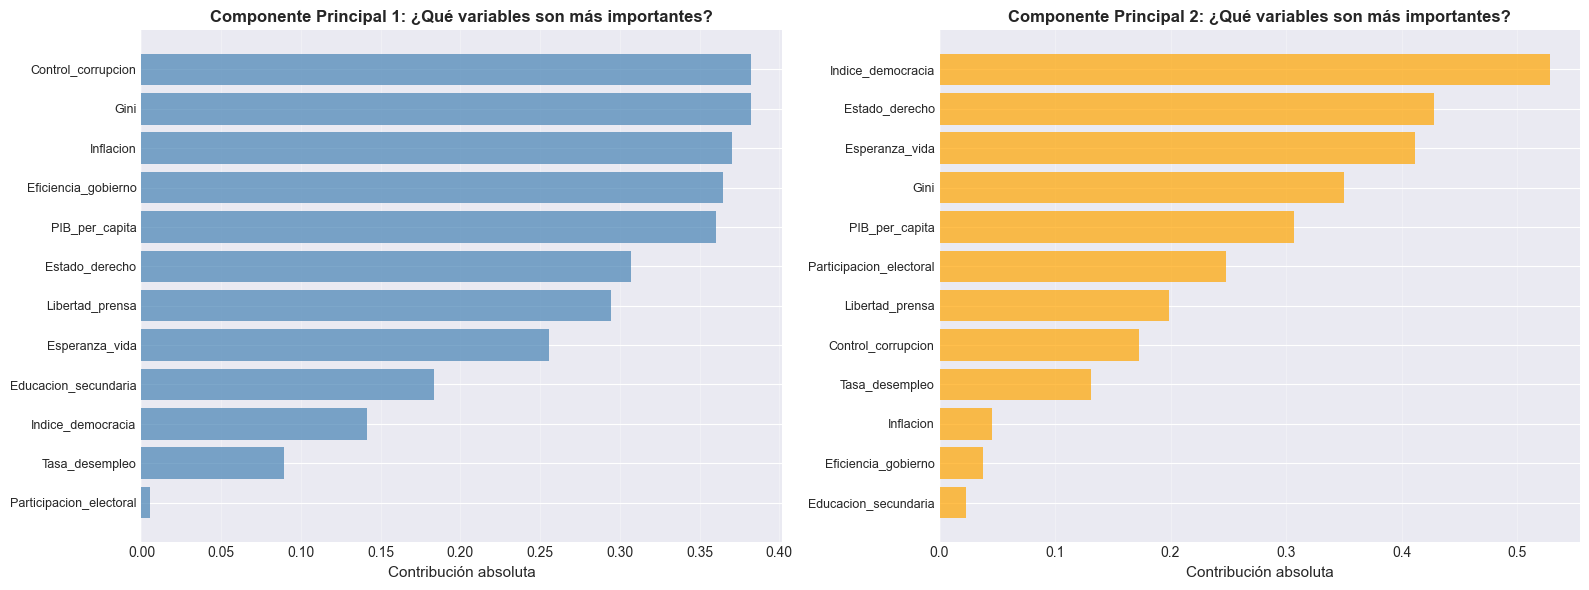


💡 INTERPRETACIÓN POLÍTICA

Basándonos en las variables que más contribuyen:

📊 Componente Principal 1 (CP1):
   - Probablemente captura una dimensión de 'Desarrollo/Calidad Institucional'
   - Países con valores altos en CP1 tienen mejores instituciones
   - Países con valores bajos tienen instituciones más débiles

📊 Componente Principal 2 (CP2):
   - Podría capturar 'Estabilidad Económica' o 'Capital Social'
   - Depende de qué variables aparezcan como más importantes
   - Representa una dimensión diferente a CP1 (son independientes)

🔍 Ejercicio:
   - Mira qué variables tienen los valores más altos en cada componente
   - ¿Tiene sentido político que estas variables vayan juntas?
   - ¿Qué nombre le darías a cada componente basándote en las variables?


CONTRIBUCIÓN DE CADA VARIABLE A LOS COMPONENTES PRINCIPALES

Los valores indican qué tan importante es cada variable para cada componente.
Valores más altos (en valor absoluto) = mayor contribución

Tabla completa:
                           CP1    CP2
PIB_per_capita          -0.360  0.307
Tasa_desempleo          -0.089  0.131
Inflacion               -0.370  0.045
Indice_democracia       -0.141  0.528
Libertad_prensa         -0.294 -0.198
Participacion_electoral -0.005  0.248
Gini                     0.383  0.350
Esperanza_vida           0.256  0.412
Educacion_secundaria     0.183 -0.023
Estado_derecho           0.307 -0.428
Control_corrupcion       0.383  0.173
Eficiencia_gobierno     -0.365  0.038


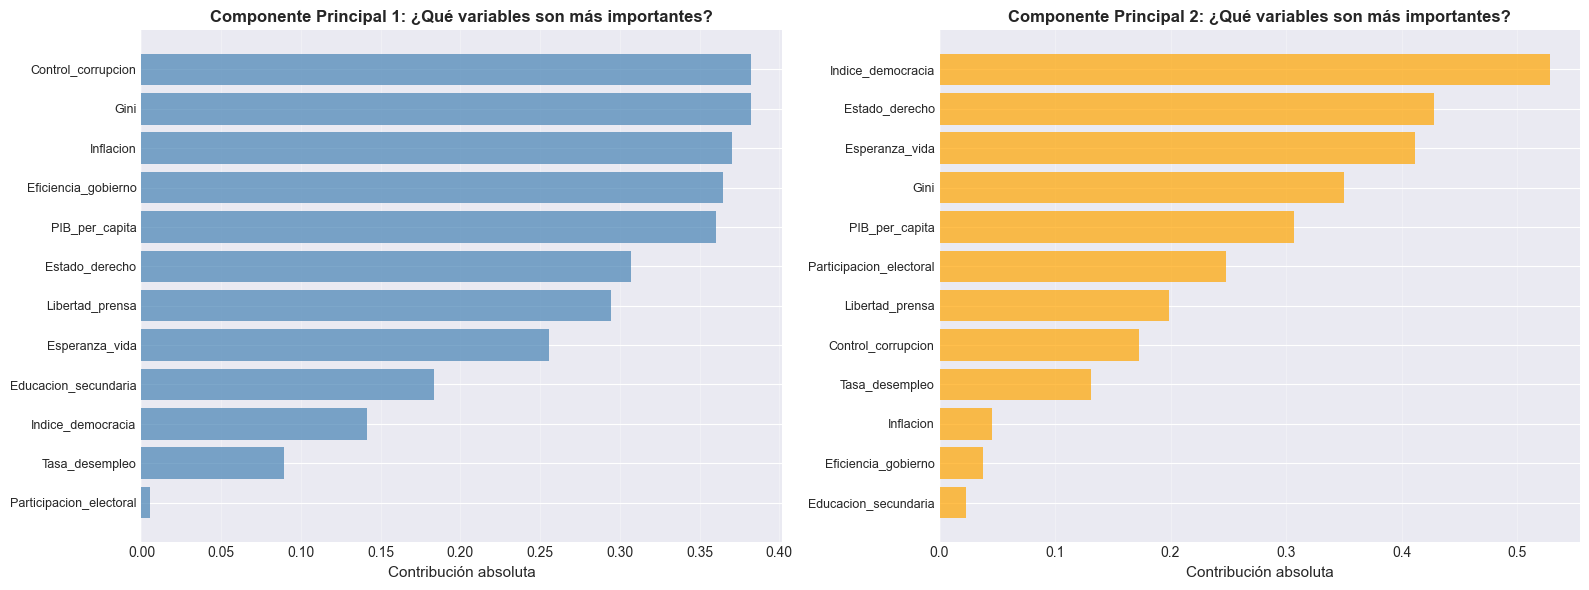


💡 INTERPRETACIÓN POLÍTICA

Basándonos en las variables que más contribuyen:

 Componente Principal 1 (CP1):
   - Probablemente captura una dimensión de 'Desarrollo/Calidad Institucional'
   - Países con valores altos en CP1 tienen mejores instituciones
   - Países con valores bajos tienen instituciones más débiles

 Componente Principal 2 (CP2):
   - Podría capturar 'Estabilidad Económica' o 'Capital Social'
   - Depende de qué variables aparezcan como más importantes
   - Representa una dimensión diferente a CP1 (son independientes)

 Ejercicio:
   - Mira qué variables tienen los valores más altos en cada componente
   - ¿Tiene sentido político que estas variables vayan juntas?
   - ¿Qué nombre le darías a cada componente basándote en las variables?


In [7]:
# ============================================================================
# INTERPRETACIÓN DE COMPONENTES: ¿QUÉ VARIABLES CONTRIBUYEN MÁS?
# ============================================================================

# pca.components_ es una matriz donde cada fila es un componente y cada columna es una variable
# .T transpone la matriz (intercambia filas y columnas)
# [:, :2] toma solo las primeras 2 columnas (CP1 y CP2)
# Esto nos da los "pesos" o "cargas" (loadings) de cada variable en cada componente
componentes_df = pd.DataFrame(
    pca.components_.T[:, :2],  # Transponer y tomar solo CP1 y CP2
    columns=['CP1', 'CP2'],     # Nombres de las columnas
    index=variables            # Nombres de las variables como índice
)

print("="*70)
print("CONTRIBUCIÓN DE CADA VARIABLE A LOS COMPONENTES PRINCIPALES")
print("="*70)
print("\nLos valores indican qué tan importante es cada variable para cada componente.")
print("Valores más altos (en valor absoluto) = mayor contribución")
print("\nTabla completa:")
print(componentes_df.round(3))

# ============================================================================
# VISUALIZACIÓN DE LAS CONTRIBUCIONES
# ============================================================================

# Crear figura con 2 subgráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ========================================================================
# GRÁFICO 1: Componente Principal 1
# ========================================================================
# .abs() toma el valor absoluto (ignoramos el signo por ahora)
# .sort_values(ascending=False) ordena de mayor a menor
comp1_sorted = componentes_df['CP1'].abs().sort_values(ascending=False)

# Crear gráfico de barras horizontal
# range(len(comp1_sorted)) crea posiciones 0, 1, 2, ... para cada variable
# comp1_sorted.values son los valores de contribución
axes[0].barh(range(len(comp1_sorted)), comp1_sorted.values, color='steelblue', alpha=0.7)

# Configurar etiquetas del eje Y (nombres de variables)
axes[0].set_yticks(range(len(comp1_sorted)))
axes[0].set_yticklabels(comp1_sorted.index, fontsize=9)

# Etiquetas y título
axes[0].set_xlabel('Contribución absoluta', fontsize=11)
axes[0].set_title('Componente Principal 1: ¿Qué variables son más importantes?', 
                  fontsize=12, fontweight='bold')
axes[0].invert_yaxis()  # Invertir para que la variable más importante esté arriba
axes[0].grid(True, alpha=0.3, axis='x')

# ========================================================================
# GRÁFICO 2: Componente Principal 2
# ========================================================================
# Mismo proceso para el segundo componente
comp2_sorted = componentes_df['CP2'].abs().sort_values(ascending=False)
axes[1].barh(range(len(comp2_sorted)), comp2_sorted.values, 
             color='orange', alpha=0.7)
axes[1].set_yticks(range(len(comp2_sorted)))
axes[1].set_yticklabels(comp2_sorted.index, fontsize=9)
axes[1].set_xlabel('Contribución absoluta', fontsize=11)
axes[1].set_title('Componente Principal 2: ¿Qué variables son más importantes?', 
                 fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================================
# INTERPRETACIÓN POLÍTICA
# ============================================================================
print("\n" + "="*70)
print("💡 INTERPRETACIÓN POLÍTICA")
print("="*70)
print("\nBasándonos en las variables que más contribuyen:")
print("\n Componente Principal 1 (CP1):")
print("   - Probablemente captura una dimensión de 'Desarrollo/Calidad Institucional'")
print("   - Países con valores altos en CP1 tienen mejores instituciones")
print("   - Países con valores bajos tienen instituciones más débiles")

print("\n Componente Principal 2 (CP2):")
print("   - Podría capturar 'Estabilidad Económica' o 'Capital Social'")
print("   - Depende de qué variables aparezcan como más importantes")
print("   - Representa una dimensión diferente a CP1 (son independientes)")

print("\n Ejercicio:")
print("   - Mira qué variables tienen los valores más altos en cada componente")
print("   - ¿Tiene sentido político que estas variables vayan juntas?")
print("   - ¿Qué nombre le darías a cada componente basándote en las variables?")


### Visualización: Países en el espacio reducido

**¡El momento de la verdad!** Ahora podemos visualizar **todos los países** en solo **2 dimensiones**, capturando la mayor parte de la información de las 12 variables originales.

**¿Qué podemos ver en este gráfico?**
- **Países cercanos** = perfiles similares en todas las variables
- **Países lejanos** = perfiles muy diferentes
- **Clusters o grupos** = países que comparten características similares
- **Outliers** = países que son únicos o diferentes al resto

**Preguntas que podemos responder:**
- ¿Qué países son más similares entre sí?
- ¿Hay grupos naturales de países?
- ¿Qué país es más "único" o diferente?
- ¿Existe algún patrón geográfico o político?


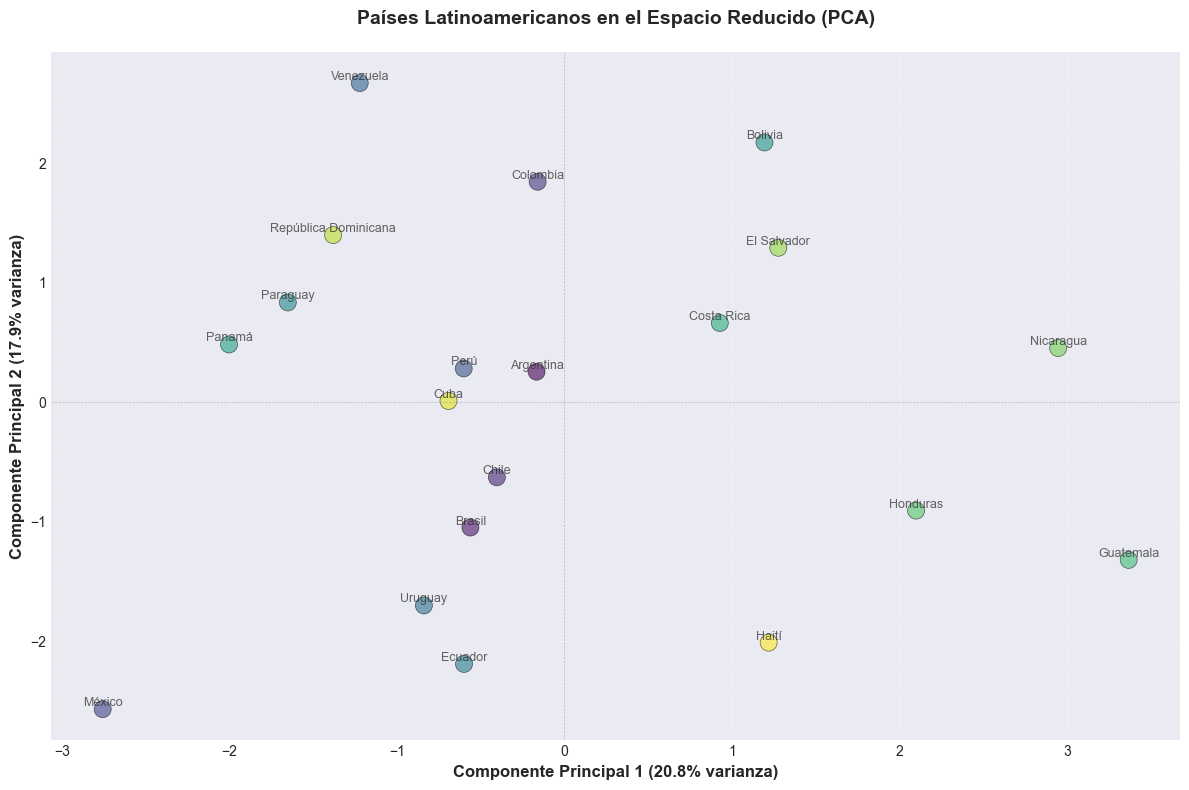


🔍 CÓMO INTERPRETAR ESTE GRÁFICO

📏 DISTANCIAS:
   - Países cercanos = perfiles similares en TODAS las 12 variables
   - Países lejanos = perfiles muy diferentes
   - La distancia refleja similitud en múltiples dimensiones a la vez

📍 POSICIÓN:
   - Países a la derecha = valores altos en CP1
   - Países a la izquierda = valores bajos en CP1
   - Países arriba = valores altos en CP2
   - Países abajo = valores bajos en CP2

👥 CLUSTERS:
   - Grupos de países cercanos = posiblemente comparten características políticas/económicas
   - ¿Puedes identificar grupos? (ej: países andinos, centroamericanos, etc.)

⭐ OUTLIERS:
   - Países aislados = perfiles únicos o diferentes al resto
   - ¿Hay algún país que se destaque por estar solo?

💡 PREGUNTAS PARA REFLEXIONAR:
   1. ¿Qué países están más cerca? ¿Tiene sentido político?
   2. ¿Hay patrones geográficos? (ej: países del Cono Sur juntos)
   3. ¿Qué país es más 'único' o diferente?
   4. ¿Qué país está en el 'centro' del espacio?


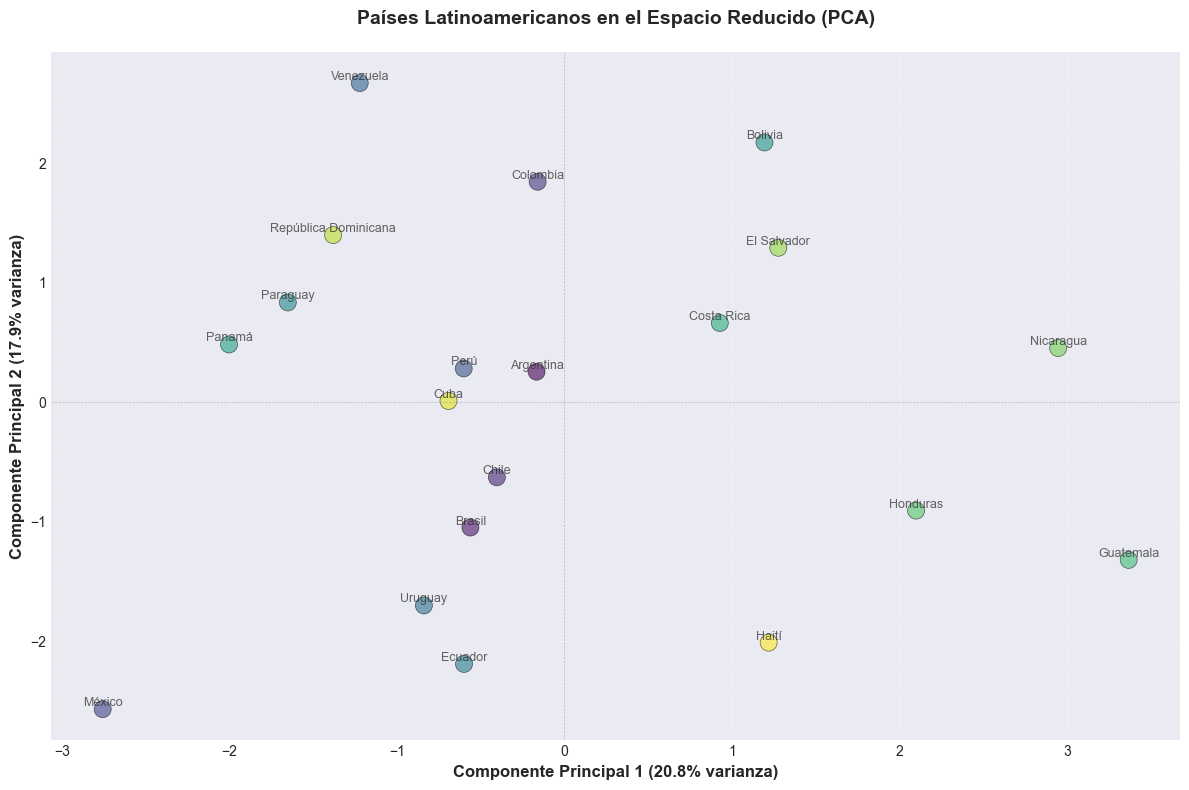


🔍 CÓMO INTERPRETAR ESTE GRÁFICO

📏 DISTANCIAS:
   - Países cercanos = perfiles similares en TODAS las 12 variables
   - Países lejanos = perfiles muy diferentes
   - La distancia refleja similitud en múltiples dimensiones a la vez

📍 POSICIÓN:
   - Países a la derecha = valores altos en CP1
   - Países a la izquierda = valores bajos en CP1
   - Países arriba = valores altos en CP2
   - Países abajo = valores bajos en CP2

👥 CLUSTERS:
   - Grupos de países cercanos = posiblemente comparten características políticas/económicas
   - ¿Puedes identificar grupos? (ej: países andinos, centroamericanos, etc.)

⭐ OUTLIERS:
   - Países aislados = perfiles únicos o diferentes al resto
   - ¿Hay algún país que se destaque por estar solo?

💡 PREGUNTAS PARA REFLEXIONAR:
   1. ¿Qué países están más cerca? ¿Tiene sentido político?
   2. ¿Hay patrones geográficos? (ej: países del Cono Sur juntos)
   3. ¿Qué país es más 'único' o diferente?
   4. ¿Qué país está en el 'centro' del espacio?


In [8]:
# ============================================================================
# VISUALIZACIÓN: PAÍSES EN EL ESPACIO DE COMPONENTES PRINCIPALES
# ============================================================================

# Crear una figura nueva con tamaño 12x8 pulgadas
plt.figure(figsize=(12, 8))

# Crear gráfico de dispersión (scatter plot)
# x = Componente Principal 1, y = Componente Principal 2
# s=150: tamaño de los puntos
# alpha=0.6: transparencia
# c=range(len(df_pca)): colores diferentes para cada país (usando índice)
# cmap='viridis': paleta de colores (verde a amarillo a morado)
scatter = plt.scatter(
    df_pca['Componente Principal 1'],      # Eje X: primer componente
    df_pca['Componente Principal 2'],        # Eje Y: segundo componente
    s=150,                                   # Tamaño de puntos
    alpha=0.6,                                # Transparencia
    c=range(len(df_pca)),                    # Color según índice
    cmap='viridis',                          # Paleta de colores
    edgecolors='black',                      # Borde negro para mejor visibilidad
    linewidths=0.5                           # Grosor del borde
)

# Etiquetar cada país en el gráfico
# enumerate() nos da el índice y el valor
for i, pais in enumerate(df_pca['Pais']):
    # annotate() agrega texto en una posición específica
    plt.annotate(
        pais,  # Texto a mostrar (nombre del país)
        # Posición (x, y) donde colocar el texto
        (df_pca['Componente Principal 1'].iloc[i],   # Coordenada X
         df_pca['Componente Principal 2'].iloc[i]),   # Coordenada Y
        fontsize=9,      # Tamaño de fuente
        alpha=0.7,       # Transparencia del texto
        ha='center',     # Alineación horizontal: centro
        va='bottom'      # Alineación vertical: abajo del punto
    )

# Etiquetar los ejes con el porcentaje de varianza explicada
# Esto nos dice cuánta información captura cada componente
varianza_cp1 = pca.explained_variance_ratio_[0] * 100
varianza_cp2 = pca.explained_variance_ratio_[1] * 100

plt.xlabel(f'Componente Principal 1 ({varianza_cp1:.1f}% varianza)', 
          fontsize=12, fontweight='bold')
plt.ylabel(f'Componente Principal 2 ({varianza_cp2:.1f}% varianza)', 
          fontsize=12, fontweight='bold')
plt.title('Países Latinoamericanos en el Espacio Reducido (PCA)', 
         fontsize=14, fontweight='bold', pad=20)

# Agregar cuadrícula para facilitar la lectura
plt.grid(True, alpha=0.3, linestyle='--')

# Agregar líneas de referencia en el origen (0, 0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Ajustar el layout para que todo se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ============================================================================
# INTERPRETACIÓN DEL GRÁFICO
# ============================================================================
print("\n" + "="*70)
print("🔍 CÓMO INTERPRETAR ESTE GRÁFICO")
print("="*70)
print("\n📏 DISTANCIAS:")
print("   - Países cercanos = perfiles similares en TODAS las 12 variables")
print("   - Países lejanos = perfiles muy diferentes")
print("   - La distancia refleja similitud en múltiples dimensiones a la vez")

print("\n📍 POSICIÓN:")
print("   - Países a la derecha = valores altos en CP1")
print("   - Países a la izquierda = valores bajos en CP1")
print("   - Países arriba = valores altos en CP2")
print("   - Países abajo = valores bajos en CP2")

print("\n👥 CLUSTERS:")
print("   - Grupos de países cercanos = posiblemente comparten características políticas/económicas")
print("   - ¿Puedes identificar grupos? (ej: países andinos, centroamericanos, etc.)")

print("\n⭐ OUTLIERS:")
print("   - Países aislados = perfiles únicos o diferentes al resto")
print("   - ¿Hay algún país que se destaque por estar solo?")

print("\n💡 PREGUNTAS PARA REFLEXIONAR:")
print("   1. ¿Qué países están más cerca? ¿Tiene sentido político?")
print("   2. ¿Hay patrones geográficos? (ej: países del Cono Sur juntos)")
print("   3. ¿Qué país es más 'único' o diferente?")
print("   4. ¿Qué país está en el 'centro' del espacio?")


## 6. Interpretación Detallada de Componentes Principales

Una de las partes más importantes del análisis con PCA es **interpretar qué significa cada componente principal**. En ciencias sociales, esto es crucial porque queremos darle **significado conceptual** a las dimensiones que encontramos.

### ¿Por qué es importante interpretar los componentes?

- **Validez conceptual**: Necesitamos asegurarnos de que los componentes tienen sentido teórico
- **Comunicación**: Los resultados deben ser comunicables a otros investigadores
- **Aplicación práctica**: Para usar los componentes en análisis posteriores, necesitamos entender qué representan

### ¿Cómo interpretamos los componentes?

Cada componente principal es una **combinación lineal de las variables originales**. Los coeficientes (llamados "cargas" o "loadings") nos dicen:

- **Valores altos (positivos o negativos)**: Esa variable contribuye mucho al componente
- **Valores cercanos a cero**: Esa variable no está relacionada con ese componente

Al analizar qué variables tienen cargas altas en cada componente, podemos **darle un nombre interpretable** a cada dimensión.

### Proceso de interpretación:

1. **Identificar las cargas más altas** en cada componente
2. **Agrupar variables relacionadas** conceptualmente
3. **Nombrar el componente** basándose en las variables que lo componen
4. **Validar** que el nombre tiene sentido teórico



### Función para Analizar las Cargas Factoriales

Las **cargas factoriales** (loadings) nos dicen qué tan importante es cada variable original para cada componente principal. Vamos a crear una función que nos permita analizar estas cargas de manera sistemática.

**¿Qué es una carga factorial?**
- Es un número entre -1 y 1 que indica la correlación entre una variable y un componente
- Valores cercanos a +1 o -1: la variable está fuertemente relacionada con el componente
- Valores cercanos a 0: la variable no está relacionada con ese componente

**Interpretación:**
- Si PIB_per_capita tiene una carga alta positiva en PC1, significa que los países con valores altos en PC1 tienen un PIB alto
- Si múltiples variables económicas tienen cargas altas en el mismo componente, ese componente probablemente representa una dimensión económica



In [9]:
# ============================================================================
# ANÁLISIS DE CARGAS FACTORIALES PARA INTERPRETACIÓN
# ============================================================================

def analizar_cargas_factoriales(pca_modelo, nombres_variables, n_componentes=3):
    """
    Analiza las cargas factoriales de los componentes principales.
    
    Las cargas factoriales nos dicen qué variables contribuyen más a cada componente.
    Esto nos permite interpretar y nombrar cada componente de manera significativa.
    
    Parámetros:
    -----------
    pca_modelo : objeto PCA
        Modelo PCA ya ajustado (fitted)
    nombres_variables : list
        Lista con los nombres de las variables originales
    n_componentes : int
        Número de componentes a analizar (por defecto 3)
    
    Retorna:
    --------
    DataFrame
        DataFrame con las cargas factoriales para cada componente
    """
    # Obtener las cargas factoriales (componentes_ = eigenvectors)
    # Cada fila es un componente, cada columna es una variable
    cargas = pca_modelo.components_[:n_componentes]
    
    # Crear DataFrame para mejor visualización
    df_cargas = pd.DataFrame(
        cargas.T,  # Transponer: filas = variables, columnas = componentes
        columns=[f'PC{i+1}' for i in range(n_componentes)],
        index=nombres_variables
    )
    
    return df_cargas


def identificar_variables_importantes(df_cargas, umbral=0.3):
    """
    Identifica qué variables son importantes para cada componente.
    
    Una variable es "importante" si su carga factorial (en valor absoluto) 
    es mayor que el umbral especificado.
    
    Parámetros:
    -----------
    df_cargas : DataFrame
        DataFrame con las cargas factoriales
    umbral : float
        Valor mínimo (en absoluto) para considerar una variable importante
        
    Retorna:
    --------
    dict
        Diccionario donde las claves son los componentes y los valores son
        listas de tuplas (variable, carga) ordenadas por importancia
    """
    variables_importantes = {}
    
    for componente in df_cargas.columns:
        # Obtener cargas en valor absoluto y ordenar
        cargas_componente = df_cargas[componente].abs().sort_values(ascending=False)
        
        # Filtrar por umbral
        variables_filtradas = cargas_componente[cargas_componente >= umbral]
        
        # Crear lista de tuplas (variable, carga_original)
        lista_variables = [
            (var, df_cargas.loc[var, componente])
            for var in variables_filtradas.index
        ]
        
        variables_importantes[componente] = lista_variables
    
    return variables_importantes


def nombrar_componente(variables_importantes_componente, nombres_variables_interpretables=None):
    """
    Sugiere un nombre para un componente basándose en las variables importantes.
    
    Esta función analiza qué tipo de variables son más importantes y sugiere
    un nombre interpretable para el componente.
    
    Parámetros:
    -----------
    variables_importantes_componente : list
        Lista de tuplas (variable, carga) para un componente
    nombres_variables_interpretables : dict, opcional
        Diccionario que mapea nombres de variables a categorías interpretables
        
    Retorna:
    --------
    str
        Nombre sugerido para el componente
    """
    # Si no se proporciona diccionario, usar categorías por defecto
    if nombres_variables_interpretables is None:
        nombres_variables_interpretables = {}
    
    # Agrupar variables por tipo (económico, social, institucional, etc.)
    categorias = {
        'economico': ['pib', 'desempleo', 'inflacion', 'economia', 'gdp', 'unemployment', 'inflation'],
        'social': ['educacion', 'esperanza', 'vida', 'salud', 'education', 'life', 'health'],
        'institucional': ['estado', 'derecho', 'corrupcion', 'gobierno', 'eficiencia', 
                         'rule', 'corruption', 'government', 'efficiency'],
        'politico': ['democracia', 'libertad', 'prensa', 'participacion', 'electoral',
                    'democracy', 'freedom', 'press', 'participation', 'electoral'],
        'desigualdad': ['gini', 'desigualdad', 'inequality']
    }
    
    # Contar categorías presentes
    conteo_categorias = {cat: 0 for cat in categorias.keys()}
    
    for var, carga in variables_importantes_componente:
        var_lower = var.lower()
        for cat, palabras_clave in categorias.items():
            if any(palabra in var_lower for palabra in palabras_clave):
                conteo_categorias[cat] += abs(carga)
                break
    
    # Determinar nombre basado en categorías dominantes
    categorias_dominantes = sorted(conteo_categorias.items(), key=lambda x: x[1], reverse=True)[:2]
    
    nombres_posibles = {
        ('economico', 'social'): 'Desarrollo Socioeconómico',
        ('institucional', 'politico'): 'Calidad Institucional y Democrática',
        ('economico',): 'Desarrollo Económico',
        ('social',): 'Bienestar Social',
        ('institucional',): 'Calidad Institucional',
        ('politico',): 'Calidad Democrática',
        ('desigualdad', 'social'): 'Equidad Social'
    }
    
    claves_dominantes = tuple(cat for cat, _ in categorias_dominantes if _ > 0)
    
    if claves_dominantes in nombres_posibles:
        return nombres_posibles[claves_dominantes]
    elif len(claves_dominantes) == 1:
        return f'Componente {claves_dominantes[0].title()}'
    else:
        return 'Componente Multidimensional'


# Verificar que tenemos el modelo PCA y las variables
if 'pca' in globals() and 'variables' in globals():
    print("="*70)
    print("ANÁLISIS DE CARGAS FACTORIALES PARA INTERPRETACIÓN")
    print("="*70)
    
    # Analizar cargas factoriales
    print("\n📊 Analizando cargas factoriales de los componentes principales...")
    df_cargas = analizar_cargas_factoriales(pca, variables, n_componentes=3)
    
    # Mostrar tabla de cargas
    print("\n" + "="*70)
    print("CARGAS FACTORIALES DE LOS COMPONENTES PRINCIPALES")
    print("="*70)
    print("\n💡 Interpretación:")
    print("   - Valores cercanos a +1 o -1: variable muy importante para el componente")
    print("   - Valores cercanos a 0: variable poco relacionada con el componente")
    print("   - Signo positivo: cuando el componente aumenta, la variable aumenta")
    print("   - Signo negativo: cuando el componente aumenta, la variable disminuye")
    print("\n" + df_cargas.round(3).to_string())
    
    # Identificar variables importantes
    print("\n" + "="*70)
    print("VARIABLES IMPORTANTES POR COMPONENTE (carga ≥ 0.3)")
    print("="*70)
    variables_importantes = identificar_variables_importantes(df_cargas, umbral=0.3)
    
    for componente, lista_vars in variables_importantes.items():
        print(f"\n{componente.upper()}:")
        if lista_vars:
            for var, carga in lista_vars[:5]:  # Top 5 variables
                signo = "+" if carga >= 0 else "-"
                print(f"   {signo} {var:30s}: {carga:7.3f}")
        else:
            print("   No hay variables con carga ≥ 0.3")
    
    # Sugerir nombres para los componentes
    print("\n" + "="*70)
    print("INTERPRETACIÓN Y NOMBRES SUGERIDOS PARA LOS COMPONENTES")
    print("="*70)
    
    nombres_interpretables = {}
    for componente in df_cargas.columns:
        lista_vars = variables_importantes.get(componente, [])
        nombre_sugerido = nombrar_componente(lista_vars)
        nombres_interpretables[componente] = nombre_sugerido
        
        print(f"\n{componente.upper()}: '{nombre_sugerido}'")
        if lista_vars:
            print(f"   Variables principales:")
            for var, carga in lista_vars[:3]:
                signo = "+" if carga >= 0 else "-"
                print(f"      {signo} {var} (carga: {carga:.3f})")
    
    print("\n💡 Nota: Estos nombres son sugerencias. Debes validarlos basándote en")
    print("   tu conocimiento teórico del campo. ¿Tiene sentido que estas variables")
    print("   vayan juntas conceptualmente?")
    
else:
    print("⚠️ No se encontraron las variables 'pca' o 'variables'")
    print("   Ejecuta primero las celdas de PCA para crear estas variables")



ANÁLISIS DE CARGAS FACTORIALES PARA INTERPRETACIÓN

📊 Analizando cargas factoriales de los componentes principales...

CARGAS FACTORIALES DE LOS COMPONENTES PRINCIPALES

💡 Interpretación:
   - Valores cercanos a +1 o -1: variable muy importante para el componente
   - Valores cercanos a 0: variable poco relacionada con el componente
   - Signo positivo: cuando el componente aumenta, la variable aumenta
   - Signo negativo: cuando el componente aumenta, la variable disminuye

                           PC1    PC2    PC3
PIB_per_capita          -0.360  0.307 -0.288
Tasa_desempleo          -0.089  0.131  0.034
Inflacion               -0.370  0.045 -0.035
Indice_democracia       -0.141  0.528  0.183
Libertad_prensa         -0.294 -0.198 -0.333
Participacion_electoral -0.005  0.248 -0.316
Gini                     0.383  0.350 -0.006
Esperanza_vida           0.256  0.412  0.003
Educacion_secundaria     0.183 -0.023  0.632
Estado_derecho           0.307 -0.428 -0.199
Control_corrupcion       

ANÁLISIS DE CARGAS FACTORIALES PARA INTERPRETACIÓN

📊 Analizando cargas factoriales de los componentes principales...

CARGAS FACTORIALES DE LOS COMPONENTES PRINCIPALES

💡 Interpretación:
   - Valores cercanos a +1 o -1: variable muy importante para el componente
   - Valores cercanos a 0: variable poco relacionada con el componente
   - Signo positivo: cuando el componente aumenta, la variable aumenta
   - Signo negativo: cuando el componente aumenta, la variable disminuye

                           PC1    PC2    PC3
PIB_per_capita          -0.360  0.307 -0.288
Tasa_desempleo          -0.089  0.131  0.034
Inflacion               -0.370  0.045 -0.035
Indice_democracia       -0.141  0.528  0.183
Libertad_prensa         -0.294 -0.198 -0.333
Participacion_electoral -0.005  0.248 -0.316
Gini                     0.383  0.350 -0.006
Esperanza_vida           0.256  0.412  0.003
Educacion_secundaria     0.183 -0.023  0.632
Estado_derecho           0.307 -0.428 -0.199
Control_corrupcion       

### Visualización de Cargas Factoriales

Una manera muy efectiva de interpretar los componentes es visualizar las cargas factoriales. Esto nos permite:

- **Ver qué variables están agrupadas** en cada componente
- **Identificar patrones visualmente** 
- **Comunicar los resultados** de manera más clara

Vamos a crear visualizaciones que muestren las cargas factoriales de forma intuitiva.


VISUALIZACIÓN DE CARGAS FACTORIALES

📊 Creando gráficos de barras de cargas factoriales...


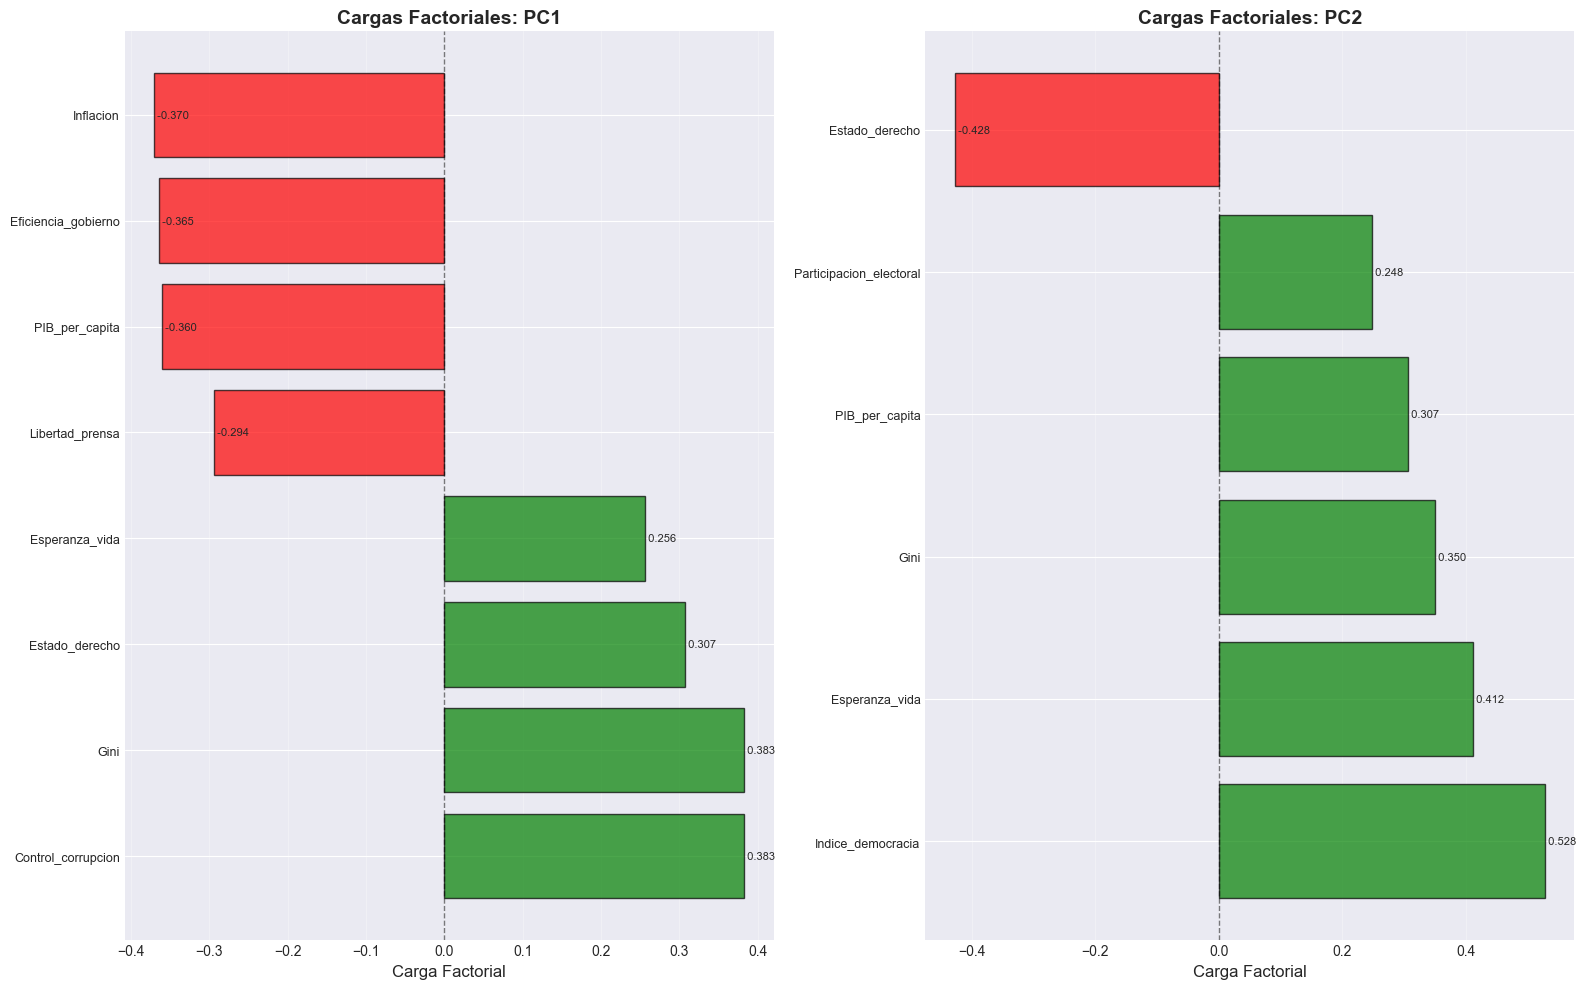


📊 Creando heatmap de cargas factoriales...


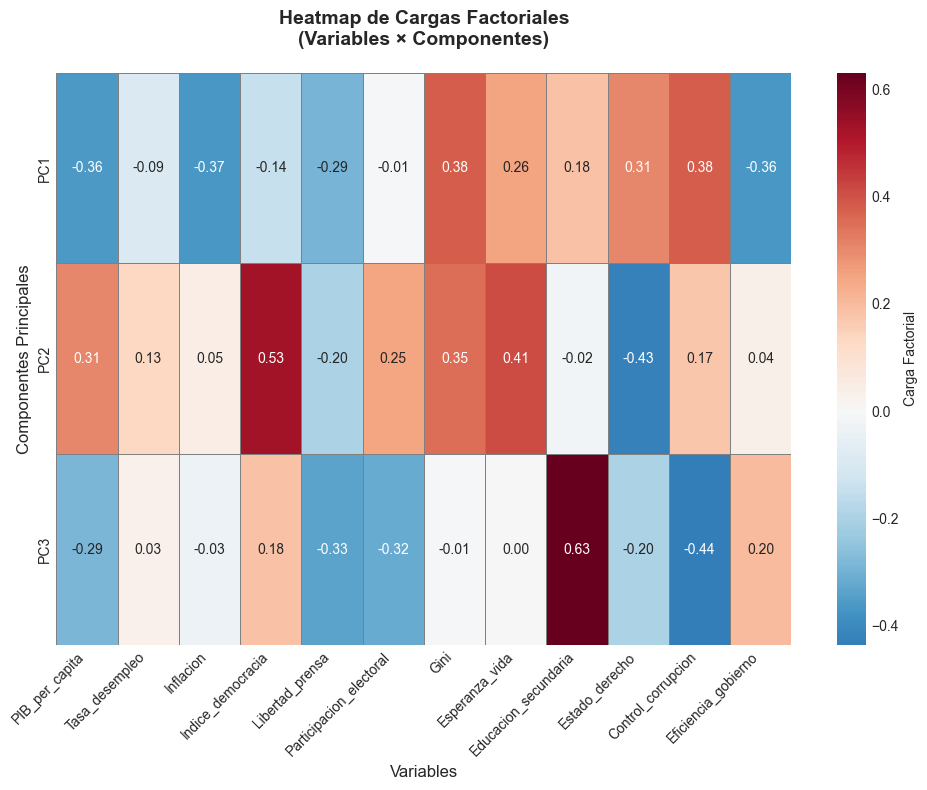


💡 Interpretación de las visualizaciones:
   - Barras verdes (positivas) vs rojas (negativas) muestran la dirección
   - La longitud de la barra muestra la magnitud de la relación
   - El heatmap permite ver patrones entre múltiples componentes a la vez


In [11]:
# ============================================================================
# VISUALIZACIÓN DE CARGAS FACTORIALES
# ============================================================================

def visualizar_cargas_factoriales(df_cargas, n_componentes_visualizar=2, umbral_visualizacion=0.2):
    """
    Crea visualizaciones de las cargas factoriales para interpretación.
    
    Parámetros:
    -----------
    df_cargas : DataFrame
        DataFrame con las cargas factoriales
    n_componentes_visualizar : int
        Número de componentes a visualizar (típicamente 2)
    umbral_visualizacion : float
        Umbral mínimo para mostrar una variable en el gráfico
    """
    # Filtrar componentes a visualizar
    componentes_visualizar = df_cargas.columns[:n_componentes_visualizar]
    
    # Crear figura con subplots
    fig, axes = plt.subplots(1, len(componentes_visualizar), figsize=(8*len(componentes_visualizar), 10))
    
    if len(componentes_visualizar) == 1:
        axes = [axes]
    
    for idx, componente in enumerate(componentes_visualizar):
        # Filtrar variables con cargas significativas
        cargas_componente = df_cargas[componente].abs()
        variables_significativas = cargas_componente[cargas_componente >= umbral_visualizacion].index
        
        if len(variables_significativas) > 0:
            # Obtener cargas para variables significativas
            cargas_plot = df_cargas.loc[variables_significativas, componente].sort_values()
            
            # Crear gráfico de barras horizontal
            colores = ['green' if c > 0 else 'red' for c in cargas_plot.values]
            axes[idx].barh(range(len(cargas_plot)), cargas_plot.values, color=colores, alpha=0.7, edgecolor='black')
            
            # Configurar etiquetas
            axes[idx].set_yticks(range(len(cargas_plot)))
            axes[idx].set_yticklabels(cargas_plot.index, fontsize=9)
            axes[idx].axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
            axes[idx].set_xlabel('Carga Factorial', fontsize=12)
            axes[idx].set_title(f'Cargas Factoriales: {componente}', fontsize=14, fontweight='bold')
            axes[idx].grid(True, alpha=0.3, axis='x')
            axes[idx].invert_yaxis()
            
            # Agregar valores
            for i, (var, carga) in enumerate(cargas_plot.items()):
                axes[idx].text(carga, i, f' {carga:.3f}', va='center', fontsize=8)
    
    plt.tight_layout()
    return plt


def crear_heatmap_cargas(df_cargas, n_componentes=3):
    """
    Crea un heatmap de las cargas factoriales.
    
    Un heatmap permite ver todas las relaciones entre variables y componentes
    de manera simultánea, identificando patrones visualmente.
    """
    # Filtrar componentes
    componentes_plot = df_cargas.columns[:n_componentes]
    
    # Crear heatmap
    fig, ax = plt.subplots(figsize=(10, max(8, len(df_cargas)*0.4)))
    
    sns.heatmap(
        df_cargas[componentes_plot].T,
        annot=True,
        fmt='.2f',
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Carga Factorial'},
        ax=ax,
        linewidths=0.5,
        linecolor='gray'
    )
    
    ax.set_title('Heatmap de Cargas Factoriales\n(Variables × Componentes)', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Variables', fontsize=12)
    ax.set_ylabel('Componentes Principales', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    return plt


# Verificar que tenemos las cargas
if 'df_cargas' in globals() or ('pca' in globals() and 'variables' in globals()):
    # Si no tenemos df_cargas, crearlo
    if 'df_cargas' not in globals():
        if 'pca' in globals() and 'variables' in globals():
            df_cargas = analizar_cargas_factoriales(pca, variables, n_componentes=3)
    
    print("="*70)
    print("VISUALIZACIÓN DE CARGAS FACTORIALES")
    print("="*70)
    
    # Visualización 1: Gráficos de barras por componente
    print("\n📊 Creando gráficos de barras de cargas factoriales...")
    visualizar_cargas_factoriales(df_cargas, n_componentes_visualizar=2, umbral_visualizacion=0.2)
    plt.show()
    
    # Visualización 2: Heatmap
    print("\n📊 Creando heatmap de cargas factoriales...")
    crear_heatmap_cargas(df_cargas, n_componentes=3)
    plt.show()
    
    print("\n💡 Interpretación de las visualizaciones:")
    print("   - Barras verdes (positivas) vs rojas (negativas) muestran la dirección")
    print("   - La longitud de la barra muestra la magnitud de la relación")
    print("   - El heatmap permite ver patrones entre múltiples componentes a la vez")
    
else:
    print("⚠️ No se encontraron las cargas factoriales")
    print("   Ejecuta primero la celda de análisis de cargas factoriales")



## Casos de uso en Ciencias Políticas

### ¿Cuándo usar reducción de dimensiones?

1. **Análisis de votaciones legislativas**
   - Muchas votaciones → pocas dimensiones ideológicas
   - Identificar coaliciones y bloques

2. **Indicadores de desarrollo**
   - Múltiples indicadores → dimensiones subyacentes
   - Comparar países de manera más clara

3. **Encuestas y opinión pública**
   - Muchas preguntas → dimensiones de opinión
   - Identificar grupos de votantes

4. **Análisis de políticas públicas**
   - Múltiples variables de resultado → dimensiones de efectividad


---

# PARTE 2: ANÁLISIS DE SENTIMIENTOS

## ¿Qué es el análisis de sentimientos?

**Intuición:** Extraer automáticamente la actitud emocional (positiva, negativa, neutra) de un texto.

**Para politólogos:** 
- Analizar opinión pública en redes sociales
- Evaluar el tono de discursos políticos
- Medir reacciones a políticas públicas
- Estudiar polarización en debates

**Analogía:** Es como tener un asistente que lee miles de textos y te dice si son positivos o negativos, sin que tengas que leerlos todos.


In [13]:
# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS PARA ANÁLISIS DE TEXTO
# ============================================================================

# re: Expresiones regulares para buscar y reemplazar patrones en texto
# Útil para limpiar texto (eliminar caracteres especiales, etc.)
import re

# TextBlob: Librería simple para análisis de sentimientos
# Analiza el tono emocional de un texto (positivo, negativo, neutro)
from textblob import TextBlob

# Counter: Para contar frecuencias de palabras
# Útil para encontrar palabras más comunes
from collections import Counter

# nltk: Natural Language Toolkit - Librería completa para procesamiento de lenguaje natural
import nltk
from nltk.corpus import stopwords  # Palabras comunes que no aportan significado (ej: "el", "la")
from nltk.tokenize import word_tokenize  # Dividir texto en palabras individuales

# ============================================================================
# CONFIGURACIÓN DE RECURSOS DE NLTK
# ============================================================================

# NLTK necesita descargar algunos recursos la primera vez que se usa
# Usamos try/except para evitar errores si ya están descargados

# Descargar tokenizer de puntuación (para dividir texto en palabras)
# 'punkt_tab' es el recurso actualizado de NLTK (versiones recientes usan 'punkt_tab' en lugar de 'punkt')
# Es un modelo que sabe dónde están los límites de las palabras
try:
    # Intentar encontrar el recurso punkt_tab (versión nueva)
    nltk.data.find('tokenizers/punkt_tab')
    print("✅ Tokenizer 'punkt_tab' ya está disponible")
except LookupError:
    try:
        # Si no existe punkt_tab, intentar con punkt (versión antigua)
        nltk.data.find('tokenizers/punkt')
        print("✅ Tokenizer 'punkt' ya está disponible (versión antigua)")
    except LookupError:
        # Si ninguno existe, descargar punkt_tab
        print("Descargando tokenizer 'punkt_tab'...")
        nltk.download('punkt_tab', quiet=True)
        print("✅ Tokenizer 'punkt_tab' descargado")

# Descargar lista de stopwords (palabras comunes sin significado)
# Stopwords son palabras como "el", "la", "de", "que", etc.
try:
    nltk.data.find('corpora/stopwords')
    print("✅ Stopwords ya están disponibles")
except LookupError:
    print("Descargando stopwords...")
    nltk.download('stopwords', quiet=True)
    print("✅ Stopwords descargados")

# ============================================================================
# CONFIGURAR STOPWORDS EN ESPAÑOL
# ============================================================================

# Stopwords son palabras muy comunes que no aportan información semántica
# Ejemplos: "el", "la", "de", "que", "y", "a", "en", "un", etc.
# Las eliminamos del análisis porque aparecen en todos los textos

try:
    # Intentar cargar stopwords en español desde NLTK
    stop_words_es = set(stopwords.words('spanish'))
    print(f"✅ Stopwords en español cargados: {len(stop_words_es)} palabras")
except:
    # Si falla, usar una lista manual básica
    stop_words_es = set(['el', 'la', 'de', 'que', 'y', 'a', 'en', 'un', 'ser', 'se', 
                        'no', 'haber', 'por', 'con', 'su', 'para', 'como', 'estar', 
                        'tener', 'le', 'lo', 'todo', 'pero', 'más', 'hacer', 'o', 
                        'poder', 'decir', 'este', 'ir', 'otro', 'ese', 'la', 'si', 
                        'me', 'ya', 'ver', 'porque', 'dar', 'cuando', 'él', 'muy', 
                        'sin', 'vez', 'mucho', 'saber', 'qué', 'sobre', 'mi', 
                        'alguno', 'mismo', 'yo', 'también', 'hasta'])
    print(f"⚠️  Usando lista manual de stopwords: {len(stop_words_es)} palabras")

print("\n✅ Librerías y recursos configurados correctamente!")


✅ Tokenizer 'punkt' ya está disponible (versión antigua)
✅ Stopwords ya están disponibles
✅ Stopwords en español cargados: 313 palabras

✅ Librerías y recursos configurados correctamente!


✅ Tokenizer 'punkt_tab' ya está disponible
✅ Stopwords ya están disponibles
✅ Stopwords en español cargados: 313 palabras

✅ Librerías y recursos configurados correctamente!


## Ejemplo práctico: Análisis de tweets sobre política

Vamos a trabajar con textos simulados de redes sociales sobre temas políticos.


In [14]:
# ============================================================================
# CREAR DATASET EXPANDIDO DE TWEETS SOBRE POLÍTICA
# ============================================================================

# Tweets positivos
tweets_positivos = [
    "El gobierno está haciendo un excelente trabajo mejorando la economía del país",
    "La nueva ley de educación es un gran avance para nuestro país",
    "Me encanta ver cómo mejoran los servicios públicos día a día",
    "Finalmente tenemos un gobierno que escucha a la ciudadanía",
    "Excelente iniciativa para combatir la pobreza en las zonas rurales",
    "Las nuevas políticas de salud pública son muy positivas",
    "Me siento orgulloso de los avances democráticos de nuestro país",
    "Buen trabajo en la reforma del sistema de pensiones",
    "Progreso real en la protección del medio ambiente",
    "Inversión histórica en infraestructura, esto es lo que necesitábamos",
    "La reducción del desempleo muestra que las políticas económicas funcionan",
    "Excelente gestión en la crisis sanitaria, el gobierno respondió rápido",
    "Me alegra ver mayor transparencia en las instituciones públicas",
    "Las nuevas oportunidades educativas están transformando comunidades",
    "El apoyo a las pequeñas empresas está generando empleo y crecimiento",
    "Celebro la aprobación de leyes que protegen los derechos humanos",
    "Los indicadores de desarrollo muestran un país que avanza positivamente",
    "Increíble trabajo del gobierno en mejorar la seguridad ciudadana",
    "Las políticas de inclusión social están dando resultados extraordinarios",
    "Orgulloso de vivir en un país con instituciones cada vez más sólidas"
]

# Tweets negativos
tweets_negativos = [
    "Estoy muy decepcionado con las políticas actuales, todo va mal",
    "Corrupción por todas partes, esto es inaceptable",
    "Los políticos solo piensan en sus intereses, no en el pueblo",
    "La inflación está destruyendo el poder adquisitivo de las familias",
    "Otro escándalo más, cuando terminará esta corrupción",
    "El desempleo sigue aumentando, necesitamos cambios urgentes",
    "Los impuestos son demasiado altos, esto ahoga a las empresas",
    "La inseguridad en las calles es alarmante, necesitamos acción",
    "Los servicios públicos siguen siendo pésimos",
    "Más promesas incumplidas, nada nuevo bajo el sol",
    "El gobierno ignora completamente las necesidades de la ciudadanía",
    "La corrupción en las instituciones públicas es cada vez más evidente",
    "Las políticas económicas están arruinando a la clase media",
    "La violencia en las calles aumenta día a día sin control",
    "Los servicios de salud pública están colapsados y sin recursos",
    "El sistema educativo está en crisis, nuestros jóvenes están perdidos",
    "Los altos niveles de impuestos están matando a las pequeñas empresas",
    "La falta de oportunidades laborales está empujando a los jóvenes al exterior",
    "El gobierno no cumple ni una sola de sus promesas de campaña",
    "La situación del país es desesperante, necesitamos un cambio urgente"
]

# Tweets neutros o mixtos
tweets_neutros = [
    "Es importante analizar las políticas públicas con objetividad y datos",
    "Las decisiones políticas deben basarse en evidencia y no en ideologías",
    "Hay aspectos positivos y negativos en cualquier gestión gubernamental",
    "Necesitamos más diálogo entre los diferentes sectores de la sociedad",
    "La política requiere de un análisis serio y profundo, no solo emociones",
    "Debemos evaluar las propuestas políticas con criterio y racionalidad",
    "El debate público debe ser respetuoso y constructivo para avanzar",
    "La información veraz es fundamental para tomar decisiones políticas",
    "Cada gobierno tiene logros y errores que deben ser reconocidos",
    "La participación ciudadana es clave para una democracia saludable"
]

# Combinar todos los tweets
tweets_politicos = tweets_positivos + tweets_negativos + tweets_neutros

# Crear DataFrame con etiquetas
tipos = (['positivo'] * len(tweets_positivos) + 
         ['negativo'] * len(tweets_negativos) + 
         ['neutro'] * len(tweets_neutros))

df_tweets = pd.DataFrame({
    'tweet': tweets_politicos,
    'tipo': tipos
})

# Mostrar resumen
print("="*70)
print("DATASET DE TWEETS POLÍTICOS")
print("="*70)
print(f"\n📊 Total de tweets: {len(df_tweets)}")
print(f"   - Positivos: {len(tweets_positivos)}")
print(f"   - Negativos: {len(tweets_negativos)}")
print(f"   - Neutros: {len(tweets_neutros)}")
print(f"\n📝 Primeros 5 tweets:")
print("-" * 70)
for i in range(min(5, len(df_tweets))):
    print(f"{i+1}. [{df_tweets.iloc[i]['tipo'].upper()}] {df_tweets.iloc[i]['tweet'][:60]}...")

print(f"\n✅ Dataset creado exitosamente")
df_tweets.head(10)


Dataset: 20 tweets

Primeros tweets:


,tweet,tipo
0,El gobierno está haciendo un excelente trabajo...,positivo
1,Estoy muy decepcionado con las políticas actua...,negativo
2,La nueva ley de educación es un gran avance pa...,positivo
3,"Corrupción por todas partes, esto es inaceptable",negativo
4,Me encanta ver cómo mejoran los servicios públ...,positivo
5,"Los políticos solo piensan en sus intereses, n...",negativo
6,Finalmente tenemos un gobierno que escucha a l...,positivo
7,La inflación está destruyendo el poder adquisi...,negativo
8,Excelente iniciativa para combatir la pobreza ...,positivo
9,"Otro escándalo más, cuando terminará esta corr...",negativo


DATASET DE TWEETS POLÍTICOS

📊 Total de tweets: 50
   - Positivos: 20
   - Negativos: 20
   - Neutros: 10

📝 Primeros 5 tweets:
----------------------------------------------------------------------
1. [POSITIVO] El gobierno está haciendo un excelente trabajo mejorando la ...
2. [POSITIVO] La nueva ley de educación es un gran avance para nuestro paí...
3. [POSITIVO] Me encanta ver cómo mejoran los servicios públicos día a día...
4. [POSITIVO] Finalmente tenemos un gobierno que escucha a la ciudadanía...
5. [POSITIVO] Excelente iniciativa para combatir la pobreza en las zonas r...

✅ Dataset creado exitosamente


,tweet,tipo
0,El gobierno está haciendo un excelente trabajo...,positivo
1,La nueva ley de educación es un gran avance pa...,positivo
2,Me encanta ver cómo mejoran los servicios públ...,positivo
3,Finalmente tenemos un gobierno que escucha a l...,positivo
4,Excelente iniciativa para combatir la pobreza ...,positivo
5,Las nuevas políticas de salud pública son muy ...,positivo
6,Me siento orgulloso de los avances democrático...,positivo
7,Buen trabajo en la reforma del sistema de pens...,positivo
8,Progreso real en la protección del medio ambiente,positivo
9,"Inversión histórica en infraestructura, esto e...",positivo


## Preprocesamiento de texto

Antes de analizar sentimientos, necesitamos limpiar y preparar el texto.


In [15]:
# ============================================================================
# FUNCIONES DE PREPROCESAMIENTO DE TEXTO
# ============================================================================

def limpiar_texto(texto):
    """
    Limpia el texto para análisis:
    1. Convierte a minúsculas (para normalizar)
    2. Elimina caracteres especiales (mantiene solo letras y espacios)
    3. Normaliza espacios múltiples
    
    Parámetros:
    -----------
    texto : str
        Texto original a limpiar
    
    Retorna:
    --------
    str
        Texto limpio y normalizado
    """
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()


def tokenizar(texto):
    """
    Divide el texto en palabras individuales (tokens) usando split().
    (No usa NLTK, por lo que no requiere 'punkt_tab' ni ningún recurso externo.)
    
    Parámetros:
    -----------
    texto : str
        Texto a tokenizar
    
    Retorna:
    --------
    list
        Lista de palabras (tokens)
    
    Ejemplo:
    --------
    tokenizar("el gobierno está bien") 
    → ['el', 'gobierno', 'está', 'bien']
    """
    # Simplemente divide el texto en palabras separadas por espacio
    return texto.split()


# ============================================================================
# APLICAR PREPROCESAMIENTO A LOS TWEETS
# ============================================================================

df_tweets['texto_limpio'] = df_tweets['tweet'].apply(limpiar_texto)
df_tweets['tokens'] = df_tweets['texto_limpio'].apply(tokenizar)

# ============================================================================
# MOSTRAR EJEMPLO DE PREPROCESAMIENTO
# ============================================================================
print("="*70)
print("EJEMPLO DE PREPROCESAMIENTO DE TEXTO")
print("="*70)

tweet_original = df_tweets['tweet'].iloc[0]
tweet_limpio = df_tweets['texto_limpio'].iloc[0]
tweet_tokens = df_tweets['tokens'].iloc[0]

print(f"\n📝 Tweet original:")
print(f"   '{tweet_original}'")

print(f"\n🧹 Tweet limpio (sin caracteres especiales, en minúsculas):")
print(f"   '{tweet_limpio}'")

print(f"\n🔤 Tokens (palabras individuales):")
print(f"   {tweet_tokens}")
print(f"   Total: {len(tweet_tokens)} palabras")

print("\n💡 ¿Por qué preprocesar?")
print("   - Normaliza el texto (minúsculas)")
print("   - Elimina ruido (caracteres especiales)")
print("   - Facilita el análisis posterior")
print("   - Mejora la precisión del análisis de sentimientos")


EJEMPLO DE PREPROCESAMIENTO DE TEXTO

📝 Tweet original:
   'El gobierno está haciendo un excelente trabajo mejorando la economía del país'

🧹 Tweet limpio (sin caracteres especiales, en minúsculas):
   'el gobierno está haciendo un excelente trabajo mejorando la economía del país'

🔤 Tokens (palabras individuales):
   ['el', 'gobierno', 'está', 'haciendo', 'un', 'excelente', 'trabajo', 'mejorando', 'la', 'economía', 'del', 'país']
   Total: 12 palabras

💡 ¿Por qué preprocesar?
   - Normaliza el texto (minúsculas)
   - Elimina ruido (caracteres especiales)
   - Facilita el análisis posterior
   - Mejora la precisión del análisis de sentimientos


EJEMPLO DE PREPROCESAMIENTO DE TEXTO

📝 Tweet original:
   'El gobierno está haciendo un excelente trabajo mejorando la economía del país'

🧹 Tweet limpio (sin caracteres especiales, en minúsculas):
   'el gobierno está haciendo un excelente trabajo mejorando la economía del país'

🔤 Tokens (palabras individuales):
   ['el', 'gobierno', 'está', 'haciendo', 'un', 'excelente', 'trabajo', 'mejorando', 'la', 'economía', 'del', 'país']
   Total: 12 palabras

💡 ¿Por qué preprocesar?
   - Normaliza el texto (minúsculas)
   - Elimina ruido (caracteres especiales)
   - Facilita el análisis posterior
   - Mejora la precisión del análisis de sentimientos


## Método 1: Análisis de sentimientos con TextBlob

TextBlob es una librería simple que analiza sentimientos basándose en palabras positivas y negativas.


In [16]:
# ============================================================================
# ANÁLISIS DE SENTIMIENTOS CON TEXTBLOB
# ============================================================================

def analizar_sentimiento_textblob(texto):
    """
    Analiza el sentimiento de un texto usando TextBlob.
    
    TextBlob usa un diccionario de palabras con valores de sentimiento:
    - Palabras positivas (ej: "excelente", "bueno") → valores positivos
    - Palabras negativas (ej: "malo", "terrible") → valores negativos
    - Calcula un promedio ponderado para todo el texto
    
    Parámetros:
    -----------
    texto : str
        Texto a analizar (debe estar limpio)
    
    Retorna:
    --------
    tuple
        (polaridad, subjetividad)
        - polaridad: float entre -1 (muy negativo) y +1 (muy positivo)
        - subjetividad: float entre 0 (objetivo) y 1 (muy subjetivo)
    """
    # Crear objeto TextBlob con el texto
    blob = TextBlob(texto)
    
    # Extraer polaridad y subjetividad
    # polaridad: qué tan positivo/negativo es el texto
    # subjetividad: qué tan subjetivo/objetivo es el texto
    return blob.sentiment.polarity, blob.sentiment.subjectivity


# ============================================================================
# APLICAR ANÁLISIS DE SENTIMIENTOS A TODOS LOS TWEETS
# ============================================================================

# Aplicar la función a cada tweet limpio
# lambda x: función anónima que toma x (cada tweet) y aplica analizar_sentimiento_textblob
# pd.Series() convierte la tupla (polaridad, subjetividad) en una Serie de pandas
# Esto permite crear dos columnas nuevas a la vez
df_tweets[['polaridad', 'subjetividad']] = df_tweets['texto_limpio'].apply(
    lambda x: pd.Series(analizar_sentimiento_textblob(x))
)

# ============================================================================
# CLASIFICAR SENTIMIENTOS EN CATEGORÍAS
# ============================================================================

def clasificar_sentimiento(polaridad):
    """
    Clasifica el sentimiento en categorías basándose en la polaridad.
    
    Parámetros:
    -----------
    polaridad : float
        Valor de polaridad entre -1 y 1
    
    Retorna:
    --------
    str
        'positivo', 'negativo', o 'neutro'
    """
    # Si la polaridad es mayor que 0.1, es positivo
    # Usamos 0.1 como umbral para evitar clasificar textos neutros como positivos
    if polaridad > 0.1:
        return 'positivo'
    # Si la polaridad es menor que -0.1, es negativo
    elif polaridad < -0.1:
        return 'negativo'
    # Si está entre -0.1 y 0.1, es neutro
    else:
        return 'neutro'


# Aplicar la clasificación a cada polaridad
df_tweets['sentimiento_predicho'] = df_tweets['polaridad'].apply(clasificar_sentimiento)

# ============================================================================
# MOSTRAR RESULTADOS
# ============================================================================
print("="*70)
print("RESULTADOS DEL ANÁLISIS DE SENTIMIENTOS")
print("="*70)

# Crear tabla con resultados relevantes
resultados = df_tweets[['tweet', 'tipo', 'polaridad', 'sentimiento_predicho']].copy()
resultados['polaridad'] = resultados['polaridad'].round(3)  # Redondear a 3 decimales

print("\nComparación: Tipo real vs Sentimiento predicho")
print("-" * 70)
print(resultados.to_string(index=False))

print("\n💡 Interpretación de la polaridad:")
print("   - Valores cercanos a +1 = muy positivo")
print("   - Valores cercanos a -1 = muy negativo")
print("   - Valores cercanos a 0 = neutro")


RESULTADOS DEL ANÁLISIS DE SENTIMIENTOS

Comparación: Tipo real vs Sentimiento predicho
----------------------------------------------------------------------
                                                                        tweet     tipo  polaridad sentimiento_predicho
El gobierno está haciendo un excelente trabajo mejorando la economía del país positivo        0.0               neutro
               Estoy muy decepcionado con las políticas actuales, todo va mal negativo        0.0               neutro
                La nueva ley de educación es un gran avance para nuestro país positivo        0.0               neutro
                             Corrupción por todas partes, esto es inaceptable negativo        0.0               neutro
                 Me encanta ver cómo mejoran los servicios públicos día a día positivo        0.0               neutro
                 Los políticos solo piensan en sus intereses, no en el pueblo negativo        0.0               neutro
        

RESULTADOS DEL ANÁLISIS DE SENTIMIENTOS

Comparación: Tipo real vs Sentimiento predicho
----------------------------------------------------------------------
                                                                        tweet     tipo  polaridad sentimiento_predicho
El gobierno está haciendo un excelente trabajo mejorando la economía del país positivo      0.000               neutro
                La nueva ley de educación es un gran avance para nuestro país positivo      0.000               neutro
                 Me encanta ver cómo mejoran los servicios públicos día a día positivo      0.000               neutro
                   Finalmente tenemos un gobierno que escucha a la ciudadanía positivo      0.000               neutro
           Excelente iniciativa para combatir la pobreza en las zonas rurales positivo      0.000               neutro
                      Las nuevas políticas de salud pública son muy positivas positivo      0.000               neutro
        

## Análisis de palabras clave

¿Qué palabras aparecen más en tweets positivos vs negativos?


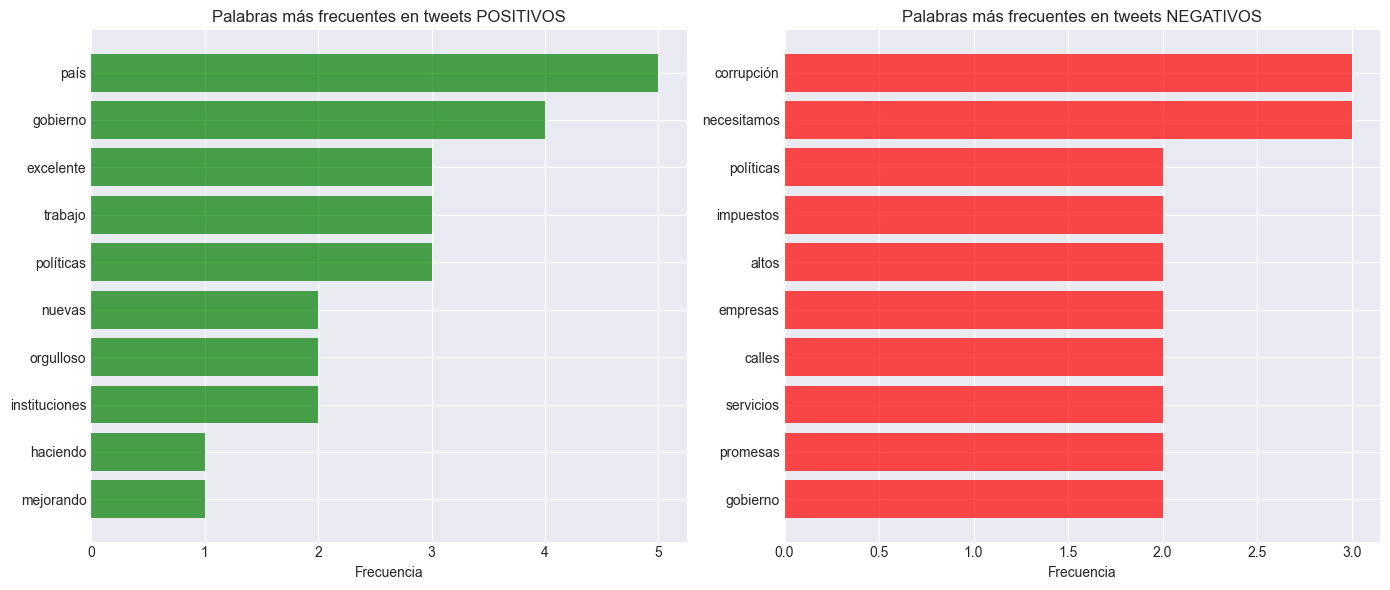


💡 Observación: Las palabras clave pueden ayudar a entender qué temas generan sentimientos positivos o negativos


In [18]:
# Extraer palabras de tweets positivos y negativos
def obtener_palabras_frecuentes(tweets, n=10):
    """
    Obtiene las palabras más frecuentes, excluyendo stopwords
    """
    todas_palabras = []
    for tokens in tweets:
        # Filtrar stopwords y palabras muy cortas
        palabras_filtradas = [p for p in tokens if p not in stop_words_es and len(p) > 3]
        todas_palabras.extend(palabras_filtradas)
    
    # Contar frecuencias
    contador = Counter(todas_palabras)
    return contador.most_common(n)

# Palabras en tweets positivos
tweets_positivos = df_tweets[df_tweets['tipo']=='positivo']['tokens']
palabras_positivas = obtener_palabras_frecuentes(tweets_positivos)

# Palabras en tweets negativos
tweets_negativos = df_tweets[df_tweets['tipo']=='negativo']['tokens']
palabras_negativas = obtener_palabras_frecuentes(tweets_negativos)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Palabras positivas
palabras_pos, frecuencias_pos = zip(*palabras_positivas)
axes[0].barh(range(len(palabras_pos)), frecuencias_pos, color='green', alpha=0.7)
axes[0].set_yticks(range(len(palabras_pos)))
axes[0].set_yticklabels(palabras_pos)
axes[0].set_xlabel('Frecuencia')
axes[0].set_title('Palabras más frecuentes en tweets POSITIVOS')
axes[0].invert_yaxis()

# Palabras negativas
palabras_neg, frecuencias_neg = zip(*palabras_negativas)
axes[1].barh(range(len(palabras_neg)), frecuencias_neg, color='red', alpha=0.7)
axes[1].set_yticks(range(len(palabras_neg)))
axes[1].set_yticklabels(palabras_neg)
axes[1].set_xlabel('Frecuencia')
axes[1].set_title('Palabras más frecuentes en tweets NEGATIVOS')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n💡 Observación: Las palabras clave pueden ayudar a entender qué temas generan sentimientos positivos o negativos")


## Casos de uso en Ciencias Políticas

### Aplicaciones del análisis de sentimientos

1. **Monitoreo de opinión pública**
   - Analizar reacciones en redes sociales a políticas públicas
   - Medir el pulso de la ciudadanía en tiempo real

2. **Análisis de campañas electorales**
   - Comparar el tono de discursos de diferentes candidatos
   - Evaluar la efectividad de mensajes políticos

3. **Estudios de polarización**
   - Medir el tono de debates políticos
   - Analizar la evolución del discurso público

4. **Evaluación de políticas**
   - Analizar comentarios ciudadanos sobre servicios públicos
   - Medir satisfacción con reformas implementadas

5. **Análisis de medios**
   - Comparar el tono de cobertura de diferentes medios
   - Estudiar sesgos en la información política


## Limitaciones y consideraciones

### Importante recordar

1. **Contexto cultural y lingüístico**
   - Los modelos pueden no capturar sarcasmo o ironía
   - El significado puede variar según el contexto político

2. **Sesgos en los datos**
   - Las redes sociales no representan a toda la población
   - Puede haber bots o cuentas falsas

3. **Interpretación cuidadosa**
   - El análisis de sentimientos es una herramienta, no una verdad absoluta
   - Siempre validar con análisis cualitativos

4. **Mejores prácticas**
   - Combinar análisis cuantitativo con análisis cualitativo
   - Considerar el contexto histórico y político
   - Usar múltiples métodos de análisis



### Recursos para profundizar

1. **Librerías Python:**
   - `scikit-learn`: PCA, clustering, análisis factorial
   - `factor_analyzer`: Análisis factorial más avanzado
   - `matplotlib`, `seaborn`: Visualizaciones avanzadas

2. **Temas relacionados:**
   - Análisis Factorial Exploratorio (EFA)
   - Análisis de Componentes Independientes (ICA)
   - Clustering (K-means, DBSCAN)
   - Análisis de correspondencias múltiples (MCA)

3. **Datos reales:**
   - Banco Mundial: Indicadores de desarrollo
   - Freedom House: Indicadores de democracia
   - Bases de datos de indicadores sociales y políticos

---
